# Management and Analysis of Physics Dataset - mod.B

## Final project: Streaming processing of cosmic rays using Drift Tubes detectors

The goal of this project is to reproduce a real-time processing of real data collected in a particle physics detector and publish the results in a dashboard for live monitoring.

### Students:
* Conforto Filippo (2021856)
* Domenichetti Lorenzo (missing)
* Faorlin Tommaso (2021857)

## Consumer notebook

In [ ]:
import os
import time
import ssl
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from kafka import KafkaProducer

from IPython import display
import pylab as pl

#in order to remove the certificate validation when the file are downloaded
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from kafka.admin import KafkaAdminClient, NewTopic
KAFKA_BOOTSTRAP_SERVERS='10.67.22.100:9092'
kafka_admin = KafkaAdminClient(
        bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
    )

In [3]:
from kafka import KafkaConsumer

In [4]:
consumer = KafkaConsumer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS,
                         consumer_timeout_ms=100000)

In [5]:
consumer.subscribe('topic_results')

In [6]:
consumer.poll(timeout_ms=0,         #<<--- do not enable dead-times before one poll to the next
              max_records=None,     #<<--- do not limit the number of records to consume at once 
              update_offsets=True   #<<--- update the reading offsets on this topic
             )

{}

In [36]:
def rt_plot(js, fig,axes):
    plt.suptitle(f'Channel distribution,{js["hits"]} total hits')
    for i, ax in enumerate(axes.flatten()):
        ax.clear()
        ax.set_title(f'Chamber {i}, {js["hits_per_chamber"][i]} hits')
        bin_centers = js["hist_1"][str(i)]["bins"][:-1] + np.diff(js["hist_1"][str(i)]["bins"])/2
        ax.hist(
        bin_centers, weights=js["hist_1"][str(i)]["counts"], bins=js["hist_1"][str(i)]["bins"], alpha=0.6
        )
        print(f'Chamber {i}, {js["hits_per_chamber"][i]} hits')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

In [13]:
js = json.loads(b'{"hits": 1000, "hits_per_chamber": [440, 0, 560, 0], "hist_1": {"0": {"bins": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], "counts": [356, 26, 7, 11, 8, 1, 1, 5, 0, 0, 3, 14, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "1": {"bins": [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], "counts": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "2": {"bins": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], "counts": [458, 59, 10, 8, 10, 0, 0, 2, 0, 0, 2, 3, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "3": {"bins": [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], "counts": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}}, "hist_2": {"0": {"bins": [91626824, 91626854, 91626884, 91626914, 91626944, 91626974, 91627004, 91627034, 91627064, 91627094, 91627124, 91627154, 91627184, 91627214, 91627244, 91627274, 91627304, 91627334, 91627364, 91627394, 91627424, 91627454, 91627484, 91627514, 91627544, 91627574, 91627604, 91627634, 91627664, 91627694, 91627724, 91627754, 91627784, 91627814, 91627844, 91627874, 91627904, 91627934, 91627964, 91627994, 91628024, 91628054, 91628084, 91628114, 91628144, 91628174, 91628204, 91628234, 91628264, 91628294, 91628324, 91628354, 91628384, 91628414, 91628444, 91628474, 91628504, 91628534, 91628564, 91628594, 91628624, 91628654, 91628684, 91628714, 91628744, 91628774, 91628804, 91628834, 91628864, 91628894, 91628924, 91628954, 91628984, 91629014, 91629044, 91629074, 91629104, 91629134, 91629164, 91629194, 91629224, 91629254, 91629284, 91629314, 91629344, 91629374, 91629404, 91629434, 91629464, 91629494, 91629524, 91629554, 91629584, 91629614, 91629644, 91629674, 91629704, 91629734, 91629764, 91629794, 91629824, 91629854, 91629884, 91629914, 91629944, 91629974, 91630004, 91630034, 91630064, 91630094, 91630124, 91630154, 91630184, 91630214, 91630244, 91630274, 91630304, 91630334, 91630364, 91630394, 91630424, 91630454, 91630484, 91630514, 91630544, 91630574, 91630604, 91630634, 91630664, 91630694, 91630724, 91630754, 91630784, 91630814, 91630844, 91630874, 91630904, 91630934, 91630964, 91630994, 91631024, 91631054, 91631084, 91631114, 91631144, 91631174, 91631204, 91631234, 91631264, 91631294, 91631324, 91631354, 91631384, 91631414, 91631444, 91631474, 91631504, 91631534, 91631564, 91631594, 91631624, 91631654, 91631684, 91631714, 91631744, 91631774, 91631804, 91631834, 91631864, 91631894, 91631924, 91631954, 91631984, 91632014, 91632044, 91632074, 91632104, 91632134, 91632164, 91632194, 91632224, 91632254, 91632284, 91632314, 91632344, 91632374, 91632404, 91632434, 91632464, 91632494, 91632524, 91632554, 91632584, 91632614, 91632644, 91632674, 91632704, 91632734, 91632764, 91632794, 91632824, 91632854, 91632884, 91632914, 91632944, 91632974, 91633004, 91633034, 91633064, 91633094, 91633124, 91633154, 91633184, 91633214, 91633244, 91633274, 91633304, 91633334, 91633364, 91633394, 91633424, 91633454, 91633484, 91633514, 91633544, 91633574, 91633604, 91633634, 91633664, 91633694, 91633724, 91633754, 91633784, 91633814, 91633844, 91633874, 91633904, 91633934, 91633964, 91633994, 91634024, 91634054, 91634084, 91634114, 91634144, 91634174, 91634204, 91634234, 91634264, 91634294, 91634324, 91634354, 91634384, 91634414, 91634444, 91634474, 91634504, 91634534, 91634564, 91634594, 91634624, 91634654, 91634684, 91634714, 91634744, 91634774, 91634804, 91634834, 91634864, 91634894, 91634924, 91634954, 91634984, 91635014, 91635044, 91635074, 91635104, 91635134, 91635164, 91635194, 91635224, 91635254, 91635284, 91635314, 91635344, 91635374, 91635404, 91635434, 91635464, 91635494, 91635524, 91635554, 91635584, 91635614, 91635644, 91635674, 91635704, 91635734, 91635764, 91635794, 91635824, 91635854, 91635884, 91635914, 91635944, 91635974, 91636004, 91636034, 91636064, 91636094, 91636124, 91636154, 91636184, 91636214, 91636244, 91636274, 91636304, 91636334, 91636364, 91636394, 91636424, 91636454, 91636484, 91636514, 91636544, 91636574, 91636604, 91636634, 91636664, 91636694, 91636724, 91636754, 91636784, 91636814, 91636844, 91636874, 91636904, 91636934, 91636964, 91636994, 91637024, 91637054, 91637084, 91637114, 91637144, 91637174, 91637204, 91637234, 91637264, 91637294, 91637324, 91637354, 91637384, 91637414, 91637444, 91637474, 91637504, 91637534, 91637564, 91637594, 91637624, 91637654, 91637684, 91637714, 91637744, 91637774, 91637804, 91637834, 91637864, 91637894, 91637924, 91637954, 91637984, 91638014, 91638044, 91638074, 91638104, 91638134, 91638164, 91638194, 91638224, 91638254, 91638284, 91638314, 91638344, 91638374, 91638404, 91638434, 91638464, 91638494, 91638524, 91638554, 91638584, 91638614, 91638644, 91638674, 91638704, 91638734, 91638764, 91638794, 91638824, 91638854, 91638884, 91638914, 91638944, 91638974, 91639004, 91639034, 91639064, 91639094, 91639124, 91639154, 91639184, 91639214, 91639244, 91639274, 91639304, 91639334, 91639364, 91639394, 91639424, 91639454, 91639484, 91639514, 91639544, 91639574, 91639604, 91639634, 91639664, 91639694, 91639724, 91639754, 91639784, 91639814, 91639844, 91639874, 91639904, 91639934, 91639964, 91639994, 91640024, 91640054, 91640084, 91640114, 91640144, 91640174, 91640204, 91640234, 91640264, 91640294, 91640324, 91640354, 91640384, 91640414, 91640444, 91640474, 91640504, 91640534, 91640564, 91640594, 91640624, 91640654, 91640684, 91640714, 91640744, 91640774, 91640804, 91640834, 91640864, 91640894, 91640924, 91640954, 91640984, 91641014, 91641044, 91641074, 91641104, 91641134, 91641164, 91641194, 91641224, 91641254, 91641284, 91641314, 91641344, 91641374, 91641404, 91641434, 91641464, 91641494, 91641524, 91641554, 91641584, 91641614, 91641644, 91641674, 91641704, 91641734, 91641764, 91641794, 91641824, 91641854, 91641884, 91641914, 91641944, 91641974, 91642004, 91642034, 91642064, 91642094, 91642124, 91642154, 91642184, 91642214, 91642244, 91642274, 91642304, 91642334, 91642364, 91642394, 91642424, 91642454, 91642484, 91642514, 91642544, 91642574, 91642604, 91642634, 91642664, 91642694, 91642724, 91642754, 91642784, 91642814, 91642844, 91642874, 91642904, 91642934, 91642964, 91642994, 91643024, 91643054, 91643084, 91643114, 91643144, 91643174, 91643204, 91643234, 91643264, 91643294, 91643324, 91643354, 91643384, 91643414, 91643444, 91643474, 91643504, 91643534, 91643564, 91643594, 91643624, 91643654, 91643684, 91643714, 91643744, 91643774, 91643804, 91643834, 91643864, 91643894, 91643924, 91643954, 91643984, 91644014, 91644044, 91644074, 91644104, 91644134, 91644164, 91644194, 91644224, 91644254, 91644284, 91644314, 91644344, 91644374, 91644404, 91644434, 91644464, 91644494, 91644524, 91644554, 91644584, 91644614, 91644644, 91644674, 91644704, 91644734, 91644764, 91644794, 91644824, 91644854, 91644884, 91644914, 91644944, 91644974, 91645004, 91645034, 91645064, 91645094, 91645124, 91645154, 91645184, 91645214, 91645244, 91645274, 91645304, 91645334, 91645364, 91645394, 91645424, 91645454, 91645484, 91645514, 91645544, 91645574, 91645604, 91645634, 91645664, 91645694, 91645724, 91645754, 91645784, 91645814, 91645844, 91645874, 91645904, 91645934, 91645964, 91645994, 91646024, 91646054, 91646084, 91646114, 91646144, 91646174, 91646204, 91646234, 91646264, 91646294, 91646324, 91646354, 91646384, 91646414, 91646444, 91646474, 91646504, 91646534, 91646564, 91646594, 91646624, 91646654, 91646684, 91646714, 91646744, 91646774, 91646804, 91646834, 91646864, 91646894, 91646924, 91646954, 91646984, 91647014, 91647044, 91647074, 91647104, 91647134, 91647164, 91647194, 91647224, 91647254, 91647284, 91647314, 91647344, 91647374, 91647404, 91647434, 91647464, 91647494, 91647524, 91647554, 91647584, 91647614, 91647644, 91647674, 91647704, 91647734, 91647764, 91647794, 91647824, 91647854, 91647884, 91647914, 91647944, 91647974, 91648004, 91648034, 91648064, 91648094, 91648124, 91648154, 91648184, 91648214, 91648244, 91648274, 91648304, 91648334, 91648364, 91648394, 91648424, 91648454, 91648484, 91648514, 91648544, 91648574, 91648604, 91648634, 91648664, 91648694, 91648724, 91648754, 91648784, 91648814, 91648844, 91648874, 91648904, 91648934, 91648964, 91648994, 91649024, 91649054, 91649084, 91649114, 91649144, 91649174, 91649204, 91649234, 91649264, 91649294, 91649324, 91649354, 91649384, 91649414, 91649444, 91649474, 91649504, 91649534, 91649564, 91649594, 91649624, 91649654, 91649684, 91649714, 91649744, 91649774, 91649804, 91649834, 91649864, 91649894, 91649924, 91649954, 91649984, 91650014, 91650044, 91650074, 91650104, 91650134, 91650164, 91650194, 91650224, 91650254, 91650284, 91650314, 91650344, 91650374, 91650404, 91650434, 91650464, 91650494, 91650524, 91650554, 91650584, 91650614, 91650644, 91650674, 91650704, 91650734, 91650764, 91650794, 91650824, 91650854, 91650884, 91650914, 91650944, 91650974, 91651004, 91651034, 91651064, 91651094, 91651124, 91651154, 91651184, 91651214, 91651244, 91651274, 91651304, 91651334, 91651364, 91651394, 91651424, 91651454, 91651484, 91651514, 91651544, 91651574, 91651604, 91651634, 91651664, 91651694, 91651724, 91651754, 91651784, 91651814, 91651844, 91651874, 91651904, 91651934, 91651964, 91651994, 91652024, 91652054, 91652084, 91652114, 91652144, 91652174, 91652204, 91652234, 91652264, 91652294, 91652324, 91652354, 91652384, 91652414, 91652444, 91652474, 91652504, 91652534, 91652564, 91652594, 91652624, 91652654, 91652684, 91652714, 91652744, 91652774, 91652804, 91652834, 91652864, 91652894, 91652924, 91652954, 91652984, 91653014, 91653044, 91653074, 91653104, 91653134, 91653164, 91653194, 91653224, 91653254, 91653284, 91653314, 91653344, 91653374, 91653404, 91653434, 91653464, 91653494, 91653524, 91653554, 91653584, 91653614, 91653644, 91653674, 91653704, 91653734, 91653764, 91653794, 91653824, 91653854, 91653884, 91653914, 91653944, 91653974, 91654004, 91654034, 91654064, 91654094, 91654124, 91654154, 91654184, 91654214, 91654244, 91654274, 91654304, 91654334, 91654364, 91654394, 91654424, 91654454, 91654484, 91654514, 91654544, 91654574, 91654604, 91654634, 91654664, 91654694, 91654724, 91654754, 91654784, 91654814, 91654844, 91654874, 91654904, 91654934, 91654964, 91654994, 91655024, 91655054, 91655084, 91655114, 91655144, 91655174, 91655204, 91655234, 91655264, 91655294, 91655324, 91655354, 91655384, 91655414, 91655444, 91655474, 91655504, 91655534, 91655564, 91655594, 91655624, 91655654, 91655684, 91655714, 91655744, 91655774, 91655804, 91655834, 91655864, 91655894, 91655924, 91655954, 91655984, 91656014, 91656044, 91656074, 91656104, 91656134, 91656164, 91656194, 91656224, 91656254, 91656284, 91656314, 91656344, 91656374, 91656404, 91656434, 91656464, 91656494, 91656524, 91656554, 91656584, 91656614, 91656644, 91656674, 91656704, 91656734, 91656764, 91656794, 91656824, 91656854, 91656884, 91656914, 91656944, 91656974, 91657004, 91657034, 91657064, 91657094, 91657124, 91657154, 91657184, 91657214, 91657244, 91657274, 91657304, 91657334, 91657364, 91657394, 91657424, 91657454, 91657484, 91657514, 91657544, 91657574, 91657604, 91657634, 91657664, 91657694, 91657724, 91657754, 91657784, 91657814, 91657844, 91657874, 91657904, 91657934, 91657964, 91657994, 91658024, 91658054, 91658084, 91658114, 91658144, 91658174, 91658204, 91658234, 91658264, 91658294, 91658324, 91658354, 91658384, 91658414, 91658444, 91658474, 91658504, 91658534, 91658564, 91658594, 91658624, 91658654, 91658684, 91658714, 91658744, 91658774, 91658804, 91658834, 91658864, 91658894, 91658924, 91658954, 91658984, 91659014, 91659044, 91659074, 91659104, 91659134, 91659164, 91659194, 91659224, 91659254, 91659284, 91659314, 91659344, 91659374, 91659404, 91659434, 91659464, 91659494, 91659524, 91659554, 91659584, 91659614, 91659644, 91659674, 91659704, 91659734, 91659764, 91659794, 91659824, 91659854, 91659884, 91659914, 91659944, 91659974, 91660004, 91660034, 91660064, 91660094, 91660124, 91660154, 91660184, 91660214, 91660244, 91660274, 91660304, 91660334, 91660364, 91660394, 91660424, 91660454, 91660484, 91660514, 91660544, 91660574, 91660604, 91660634, 91660664, 91660694, 91660724, 91660754, 91660784, 91660814, 91660844, 91660874, 91660904, 91660934, 91660964, 91660994, 91661024, 91661054, 91661084, 91661114, 91661144, 91661174, 91661204, 91661234, 91661264, 91661294, 91661324, 91661354, 91661384, 91661414, 91661444, 91661474, 91661504, 91661534, 91661564, 91661594, 91661624, 91661654, 91661684, 91661714, 91661744, 91661774, 91661804, 91661834, 91661864, 91661894, 91661924, 91661954, 91661984, 91662014, 91662044, 91662074, 91662104, 91662134, 91662164, 91662194, 91662224, 91662254, 91662284, 91662314, 91662344, 91662374, 91662404, 91662434, 91662464, 91662494, 91662524, 91662554, 91662584, 91662614, 91662644, 91662674, 91662704, 91662734, 91662764, 91662794, 91662824, 91662854, 91662884, 91662914, 91662944, 91662974, 91663004, 91663034, 91663064, 91663094, 91663124, 91663154, 91663184, 91663214, 91663244, 91663274, 91663304, 91663334, 91663364, 91663394, 91663424, 91663454, 91663484, 91663514, 91663544, 91663574, 91663604, 91663634, 91663664, 91663694, 91663724, 91663754, 91663784, 91663814, 91663844, 91663874, 91663904, 91663934, 91663964, 91663994, 91664024, 91664054, 91664084, 91664114, 91664144, 91664174, 91664204, 91664234, 91664264, 91664294, 91664324, 91664354, 91664384, 91664414, 91664444, 91664474, 91664504, 91664534, 91664564, 91664594, 91664624, 91664654, 91664684, 91664714, 91664744, 91664774, 91664804, 91664834, 91664864, 91664894, 91664924, 91664954, 91664984, 91665014, 91665044, 91665074, 91665104, 91665134, 91665164, 91665194, 91665224, 91665254, 91665284, 91665314, 91665344, 91665374, 91665404, 91665434, 91665464, 91665494, 91665524, 91665554, 91665584, 91665614, 91665644, 91665674, 91665704, 91665734, 91665764, 91665794, 91665824, 91665854, 91665884, 91665914, 91665944, 91665974, 91666004, 91666034, 91666064, 91666094, 91666124, 91666154, 91666184, 91666214, 91666244, 91666274, 91666304, 91666334, 91666364, 91666394, 91666424, 91666454, 91666484, 91666514, 91666544, 91666574, 91666604, 91666634, 91666664, 91666694, 91666724, 91666754, 91666784, 91666814, 91666844, 91666874, 91666904, 91666934, 91666964, 91666994, 91667024, 91667054, 91667084, 91667114, 91667144, 91667174, 91667204, 91667234, 91667264, 91667294, 91667324, 91667354, 91667384, 91667414, 91667444, 91667474, 91667504, 91667534, 91667564, 91667594, 91667624, 91667654, 91667684, 91667714, 91667744, 91667774, 91667804, 91667834, 91667864, 91667894, 91667924, 91667954, 91667984, 91668014, 91668044, 91668074, 91668104, 91668134, 91668164, 91668194, 91668224, 91668254, 91668284, 91668314, 91668344, 91668374, 91668404, 91668434, 91668464, 91668494, 91668524, 91668554, 91668584, 91668614, 91668644, 91668674, 91668704, 91668734, 91668764, 91668794, 91668824, 91668854, 91668884, 91668914, 91668944, 91668974, 91669004, 91669034, 91669064, 91669094, 91669124, 91669154, 91669184, 91669214, 91669244, 91669274, 91669304, 91669334, 91669364, 91669394, 91669424, 91669454, 91669484, 91669514, 91669544, 91669574, 91669604, 91669634, 91669664, 91669694, 91669724, 91669754, 91669784, 91669814, 91669844, 91669874, 91669904, 91669934, 91669964, 91669994, 91670024, 91670054, 91670084, 91670114, 91670144, 91670174, 91670204, 91670234, 91670264, 91670294, 91670324, 91670354, 91670384, 91670414, 91670444, 91670474, 91670504, 91670534, 91670564, 91670594, 91670624, 91670654, 91670684, 91670714, 91670744, 91670774, 91670804, 91670834, 91670864, 91670894, 91670924, 91670954, 91670984, 91671014, 91671044, 91671074, 91671104, 91671134, 91671164, 91671194, 91671224, 91671254, 91671284, 91671314, 91671344, 91671374, 91671404, 91671434, 91671464, 91671494, 91671524, 91671554, 91671584, 91671614, 91671644, 91671674, 91671704, 91671734, 91671764, 91671794, 91671824, 91671854, 91671884, 91671914, 91671944, 91671974, 91672004, 91672034, 91672064, 91672094, 91672124, 91672154, 91672184, 91672214, 91672244, 91672274, 91672304, 91672334, 91672364, 91672394, 91672424, 91672454, 91672484, 91672514, 91672544, 91672574, 91672604, 91672634, 91672664, 91672694, 91672724, 91672754, 91672784, 91672814, 91672844, 91672874, 91672904, 91672934, 91672964, 91672994, 91673024, 91673054, 91673084, 91673114, 91673144, 91673174, 91673204, 91673234, 91673264, 91673294, 91673324, 91673354, 91673384, 91673414, 91673444, 91673474, 91673504, 91673534, 91673564, 91673594, 91673624, 91673654, 91673684, 91673714, 91673744, 91673774, 91673804, 91673834, 91673864, 91673894, 91673924, 91673954, 91673984, 91674014, 91674044, 91674074, 91674104, 91674134, 91674164, 91674194, 91674224, 91674254, 91674284, 91674314, 91674344, 91674374, 91674404, 91674434, 91674464, 91674494, 91674524, 91674554, 91674584, 91674614, 91674644, 91674674, 91674704, 91674734, 91674764, 91674794, 91674824, 91674854, 91674884, 91674914, 91674944, 91674974, 91675004, 91675034, 91675064, 91675094, 91675124, 91675154, 91675184, 91675214, 91675244, 91675274, 91675304, 91675334, 91675364, 91675394, 91675424, 91675454, 91675484, 91675514, 91675544, 91675574, 91675604, 91675634, 91675664, 91675694, 91675724, 91675754, 91675784, 91675814, 91675844, 91675874, 91675904, 91675934, 91675964, 91675994, 91676024, 91676054, 91676084, 91676114, 91676144, 91676174, 91676204, 91676234, 91676264, 91676294, 91676324, 91676354, 91676384, 91676414, 91676444, 91676474, 91676504, 91676534, 91676564, 91676594, 91676624, 91676654, 91676684, 91676714, 91676744, 91676774, 91676804, 91676834, 91676864, 91676894, 91676924, 91676954, 91676984, 91677014, 91677044, 91677074, 91677104, 91677134, 91677164, 91677194, 91677224, 91677254, 91677284, 91677314, 91677344, 91677374, 91677404, 91677434, 91677464, 91677494, 91677524, 91677554, 91677584, 91677614, 91677644, 91677674, 91677704, 91677734, 91677764, 91677794, 91677824, 91677854, 91677884, 91677914, 91677944, 91677974, 91678004, 91678034, 91678064, 91678094, 91678124, 91678154, 91678184, 91678214, 91678244, 91678274, 91678304, 91678334, 91678364, 91678394, 91678424, 91678454, 91678484, 91678514, 91678544, 91678574, 91678604, 91678634, 91678664, 91678694, 91678724, 91678754, 91678784, 91678814, 91678844, 91678874, 91678904, 91678934, 91678964, 91678994, 91679024, 91679054, 91679084, 91679114, 91679144, 91679174, 91679204, 91679234, 91679264, 91679294, 91679324, 91679354, 91679384, 91679414, 91679444, 91679474, 91679504, 91679534, 91679564, 91679594, 91679624, 91679654, 91679684, 91679714, 91679744, 91679774, 91679804, 91679834, 91679864, 91679894, 91679924, 91679954, 91679984, 91680014, 91680044, 91680074, 91680104, 91680134, 91680164, 91680194, 91680224, 91680254, 91680284, 91680314, 91680344, 91680374, 91680404, 91680434, 91680464, 91680494, 91680524, 91680554, 91680584, 91680614, 91680644, 91680674, 91680704, 91680734, 91680764, 91680794, 91680824, 91680854, 91680884, 91680914, 91680944, 91680974, 91681004, 91681034, 91681064, 91681094, 91681124, 91681154, 91681184, 91681214, 91681244, 91681274, 91681304, 91681334, 91681364, 91681394, 91681424, 91681454, 91681484, 91681514, 91681544, 91681574, 91681604, 91681634, 91681664, 91681694, 91681724, 91681754, 91681784, 91681814, 91681844, 91681874, 91681904, 91681934, 91681964, 91681994, 91682024, 91682054, 91682084, 91682114, 91682144, 91682174, 91682204, 91682234, 91682264, 91682294, 91682324, 91682354, 91682384, 91682414, 91682444, 91682474, 91682504, 91682534, 91682564, 91682594, 91682624, 91682654, 91682684, 91682714, 91682744, 91682774, 91682804, 91682834, 91682864, 91682894, 91682924, 91682954, 91682984, 91683014, 91683044, 91683074, 91683104, 91683134, 91683164, 91683194, 91683224, 91683254, 91683284, 91683314, 91683344, 91683374, 91683404, 91683434, 91683464, 91683494, 91683524, 91683554, 91683584, 91683614, 91683644, 91683674, 91683704, 91683734, 91683764, 91683794, 91683824, 91683854, 91683884, 91683914, 91683944, 91683974, 91684004, 91684034, 91684064, 91684094, 91684124, 91684154, 91684184, 91684214, 91684244, 91684274, 91684304, 91684334, 91684364, 91684394, 91684424, 91684454, 91684484, 91684514, 91684544, 91684574, 91684604, 91684634, 91684664, 91684694, 91684724, 91684754, 91684784, 91684814, 91684844, 91684874, 91684904, 91684934, 91684964, 91684994, 91685024, 91685054, 91685084, 91685114, 91685144, 91685174, 91685204, 91685234, 91685264, 91685294, 91685324, 91685354, 91685384, 91685414, 91685444, 91685474, 91685504, 91685534, 91685564, 91685594, 91685624, 91685654, 91685684, 91685714, 91685744, 91685774, 91685804, 91685834, 91685864, 91685894, 91685924, 91685954, 91685984, 91686014, 91686044, 91686074, 91686104, 91686134, 91686164, 91686194, 91686224, 91686254, 91686284, 91686314, 91686344, 91686374, 91686404, 91686434, 91686464, 91686494, 91686524, 91686554, 91686584, 91686614, 91686644, 91686674, 91686704, 91686734, 91686764, 91686794, 91686824, 91686854, 91686884, 91686914, 91686944, 91686974, 91687004, 91687034, 91687064, 91687094, 91687124, 91687154, 91687184, 91687214, 91687244, 91687274, 91687304, 91687334, 91687364, 91687394, 91687424, 91687454, 91687484, 91687514, 91687544, 91687574, 91687604, 91687634, 91687664, 91687694, 91687724, 91687754, 91687784, 91687814, 91687844, 91687874, 91687904, 91687934, 91687964, 91687994, 91688024, 91688054, 91688084, 91688114, 91688144, 91688174, 91688204, 91688234, 91688264, 91688294, 91688324, 91688354, 91688384, 91688414, 91688444, 91688474, 91688504, 91688534, 91688564, 91688594, 91688624, 91688654, 91688684, 91688714, 91688744, 91688774, 91688804, 91688834, 91688864, 91688894, 91688924, 91688954, 91688984, 91689014, 91689044, 91689074, 91689104, 91689134, 91689164, 91689194, 91689224, 91689254, 91689284, 91689314, 91689344, 91689374, 91689404, 91689434, 91689464, 91689494, 91689524, 91689554, 91689584, 91689614, 91689644, 91689674, 91689704, 91689734, 91689764, 91689794, 91689824, 91689854, 91689884, 91689914, 91689944, 91689974, 91690004, 91690034, 91690064, 91690094, 91690124, 91690154, 91690184, 91690214, 91690244, 91690274, 91690304, 91690334, 91690364, 91690394, 91690424, 91690454, 91690484, 91690514, 91690544, 91690574, 91690604, 91690634, 91690664, 91690694, 91690724, 91690754, 91690784, 91690814, 91690844, 91690874, 91690904, 91690934, 91690964, 91690994, 91691024, 91691054, 91691084, 91691114, 91691144, 91691174, 91691204, 91691234, 91691264, 91691294, 91691324, 91691354, 91691384, 91691414, 91691444, 91691474, 91691504, 91691534, 91691564, 91691594, 91691624, 91691654, 91691684, 91691714, 91691744, 91691774, 91691804, 91691834, 91691864, 91691894, 91691924, 91691954, 91691984, 91692014, 91692044, 91692074, 91692104, 91692134, 91692164, 91692194, 91692224, 91692254, 91692284, 91692314, 91692344, 91692374, 91692404, 91692434, 91692464, 91692494, 91692524, 91692554, 91692584, 91692614, 91692644, 91692674, 91692704, 91692734, 91692764, 91692794, 91692824, 91692854, 91692884, 91692914, 91692944, 91692974, 91693004, 91693034, 91693064, 91693094, 91693124, 91693154, 91693184, 91693214, 91693244, 91693274, 91693304, 91693334, 91693364, 91693394, 91693424, 91693454, 91693484, 91693514, 91693544, 91693574, 91693604, 91693634, 91693664, 91693694], "counts": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "1": {"bins": [91626824, 91626854, 91626884, 91626914, 91626944, 91626974, 91627004, 91627034, 91627064, 91627094, 91627124, 91627154, 91627184, 91627214, 91627244, 91627274, 91627304, 91627334, 91627364, 91627394, 91627424, 91627454, 91627484, 91627514, 91627544, 91627574, 91627604, 91627634, 91627664, 91627694, 91627724, 91627754, 91627784, 91627814, 91627844, 91627874, 91627904, 91627934, 91627964, 91627994, 91628024, 91628054, 91628084, 91628114, 91628144, 91628174, 91628204, 91628234, 91628264, 91628294, 91628324, 91628354, 91628384, 91628414, 91628444, 91628474, 91628504, 91628534, 91628564, 91628594, 91628624, 91628654, 91628684, 91628714, 91628744, 91628774, 91628804, 91628834, 91628864, 91628894, 91628924, 91628954, 91628984, 91629014, 91629044, 91629074, 91629104, 91629134, 91629164, 91629194, 91629224, 91629254, 91629284, 91629314, 91629344, 91629374, 91629404, 91629434, 91629464, 91629494, 91629524, 91629554, 91629584, 91629614, 91629644, 91629674, 91629704, 91629734, 91629764, 91629794, 91629824, 91629854, 91629884, 91629914, 91629944, 91629974, 91630004, 91630034, 91630064, 91630094, 91630124, 91630154, 91630184, 91630214, 91630244, 91630274, 91630304, 91630334, 91630364, 91630394, 91630424, 91630454, 91630484, 91630514, 91630544, 91630574, 91630604, 91630634, 91630664, 91630694, 91630724, 91630754, 91630784, 91630814, 91630844, 91630874, 91630904, 91630934, 91630964, 91630994, 91631024, 91631054, 91631084, 91631114, 91631144, 91631174, 91631204, 91631234, 91631264, 91631294, 91631324, 91631354, 91631384, 91631414, 91631444, 91631474, 91631504, 91631534, 91631564, 91631594, 91631624, 91631654, 91631684, 91631714, 91631744, 91631774, 91631804, 91631834, 91631864, 91631894, 91631924, 91631954, 91631984, 91632014, 91632044, 91632074, 91632104, 91632134, 91632164, 91632194, 91632224, 91632254, 91632284, 91632314, 91632344, 91632374, 91632404, 91632434, 91632464, 91632494, 91632524, 91632554, 91632584, 91632614, 91632644, 91632674, 91632704, 91632734, 91632764, 91632794, 91632824, 91632854, 91632884, 91632914, 91632944, 91632974, 91633004, 91633034, 91633064, 91633094, 91633124, 91633154, 91633184, 91633214, 91633244, 91633274, 91633304, 91633334, 91633364, 91633394, 91633424, 91633454, 91633484, 91633514, 91633544, 91633574, 91633604, 91633634, 91633664, 91633694, 91633724, 91633754, 91633784, 91633814, 91633844, 91633874, 91633904, 91633934, 91633964, 91633994, 91634024, 91634054, 91634084, 91634114, 91634144, 91634174, 91634204, 91634234, 91634264, 91634294, 91634324, 91634354, 91634384, 91634414, 91634444, 91634474, 91634504, 91634534, 91634564, 91634594, 91634624, 91634654, 91634684, 91634714, 91634744, 91634774, 91634804, 91634834, 91634864, 91634894, 91634924, 91634954, 91634984, 91635014, 91635044, 91635074, 91635104, 91635134, 91635164, 91635194, 91635224, 91635254, 91635284, 91635314, 91635344, 91635374, 91635404, 91635434, 91635464, 91635494, 91635524, 91635554, 91635584, 91635614, 91635644, 91635674, 91635704, 91635734, 91635764, 91635794, 91635824, 91635854, 91635884, 91635914, 91635944, 91635974, 91636004, 91636034, 91636064, 91636094, 91636124, 91636154, 91636184, 91636214, 91636244, 91636274, 91636304, 91636334, 91636364, 91636394, 91636424, 91636454, 91636484, 91636514, 91636544, 91636574, 91636604, 91636634, 91636664, 91636694, 91636724, 91636754, 91636784, 91636814, 91636844, 91636874, 91636904, 91636934, 91636964, 91636994, 91637024, 91637054, 91637084, 91637114, 91637144, 91637174, 91637204, 91637234, 91637264, 91637294, 91637324, 91637354, 91637384, 91637414, 91637444, 91637474, 91637504, 91637534, 91637564, 91637594, 91637624, 91637654, 91637684, 91637714, 91637744, 91637774, 91637804, 91637834, 91637864, 91637894, 91637924, 91637954, 91637984, 91638014, 91638044, 91638074, 91638104, 91638134, 91638164, 91638194, 91638224, 91638254, 91638284, 91638314, 91638344, 91638374, 91638404, 91638434, 91638464, 91638494, 91638524, 91638554, 91638584, 91638614, 91638644, 91638674, 91638704, 91638734, 91638764, 91638794, 91638824, 91638854, 91638884, 91638914, 91638944, 91638974, 91639004, 91639034, 91639064, 91639094, 91639124, 91639154, 91639184, 91639214, 91639244, 91639274, 91639304, 91639334, 91639364, 91639394, 91639424, 91639454, 91639484, 91639514, 91639544, 91639574, 91639604, 91639634, 91639664, 91639694, 91639724, 91639754, 91639784, 91639814, 91639844, 91639874, 91639904, 91639934, 91639964, 91639994, 91640024, 91640054, 91640084, 91640114, 91640144, 91640174, 91640204, 91640234, 91640264, 91640294, 91640324, 91640354, 91640384, 91640414, 91640444, 91640474, 91640504, 91640534, 91640564, 91640594, 91640624, 91640654, 91640684, 91640714, 91640744, 91640774, 91640804, 91640834, 91640864, 91640894, 91640924, 91640954, 91640984, 91641014, 91641044, 91641074, 91641104, 91641134, 91641164, 91641194, 91641224, 91641254, 91641284, 91641314, 91641344, 91641374, 91641404, 91641434, 91641464, 91641494, 91641524, 91641554, 91641584, 91641614, 91641644, 91641674, 91641704, 91641734, 91641764, 91641794, 91641824, 91641854, 91641884, 91641914, 91641944, 91641974, 91642004, 91642034, 91642064, 91642094, 91642124, 91642154, 91642184, 91642214, 91642244, 91642274, 91642304, 91642334, 91642364, 91642394, 91642424, 91642454, 91642484, 91642514, 91642544, 91642574, 91642604, 91642634, 91642664, 91642694, 91642724, 91642754, 91642784, 91642814, 91642844, 91642874, 91642904, 91642934, 91642964, 91642994, 91643024, 91643054, 91643084, 91643114, 91643144, 91643174, 91643204, 91643234, 91643264, 91643294, 91643324, 91643354, 91643384, 91643414, 91643444, 91643474, 91643504, 91643534, 91643564, 91643594, 91643624, 91643654, 91643684, 91643714, 91643744, 91643774, 91643804, 91643834, 91643864, 91643894, 91643924, 91643954, 91643984, 91644014, 91644044, 91644074, 91644104, 91644134, 91644164, 91644194, 91644224, 91644254, 91644284, 91644314, 91644344, 91644374, 91644404, 91644434, 91644464, 91644494, 91644524, 91644554, 91644584, 91644614, 91644644, 91644674, 91644704, 91644734, 91644764, 91644794, 91644824, 91644854, 91644884, 91644914, 91644944, 91644974, 91645004, 91645034, 91645064, 91645094, 91645124, 91645154, 91645184, 91645214, 91645244, 91645274, 91645304, 91645334, 91645364, 91645394, 91645424, 91645454, 91645484, 91645514, 91645544, 91645574, 91645604, 91645634, 91645664, 91645694, 91645724, 91645754, 91645784, 91645814, 91645844, 91645874, 91645904, 91645934, 91645964, 91645994, 91646024, 91646054, 91646084, 91646114, 91646144, 91646174, 91646204, 91646234, 91646264, 91646294, 91646324, 91646354, 91646384, 91646414, 91646444, 91646474, 91646504, 91646534, 91646564, 91646594, 91646624, 91646654, 91646684, 91646714, 91646744, 91646774, 91646804, 91646834, 91646864, 91646894, 91646924, 91646954, 91646984, 91647014, 91647044, 91647074, 91647104, 91647134, 91647164, 91647194, 91647224, 91647254, 91647284, 91647314, 91647344, 91647374, 91647404, 91647434, 91647464, 91647494, 91647524, 91647554, 91647584, 91647614, 91647644, 91647674, 91647704, 91647734, 91647764, 91647794, 91647824, 91647854, 91647884, 91647914, 91647944, 91647974, 91648004, 91648034, 91648064, 91648094, 91648124, 91648154, 91648184, 91648214, 91648244, 91648274, 91648304, 91648334, 91648364, 91648394, 91648424, 91648454, 91648484, 91648514, 91648544, 91648574, 91648604, 91648634, 91648664, 91648694, 91648724, 91648754, 91648784, 91648814, 91648844, 91648874, 91648904, 91648934, 91648964, 91648994, 91649024, 91649054, 91649084, 91649114, 91649144, 91649174, 91649204, 91649234, 91649264, 91649294, 91649324, 91649354, 91649384, 91649414, 91649444, 91649474, 91649504, 91649534, 91649564, 91649594, 91649624, 91649654, 91649684, 91649714, 91649744, 91649774, 91649804, 91649834, 91649864, 91649894, 91649924, 91649954, 91649984, 91650014, 91650044, 91650074, 91650104, 91650134, 91650164, 91650194, 91650224, 91650254, 91650284, 91650314, 91650344, 91650374, 91650404, 91650434, 91650464, 91650494, 91650524, 91650554, 91650584, 91650614, 91650644, 91650674, 91650704, 91650734, 91650764, 91650794, 91650824, 91650854, 91650884, 91650914, 91650944, 91650974, 91651004, 91651034, 91651064, 91651094, 91651124, 91651154, 91651184, 91651214, 91651244, 91651274, 91651304, 91651334, 91651364, 91651394, 91651424, 91651454, 91651484, 91651514, 91651544, 91651574, 91651604, 91651634, 91651664, 91651694, 91651724, 91651754, 91651784, 91651814, 91651844, 91651874, 91651904, 91651934, 91651964, 91651994, 91652024, 91652054, 91652084, 91652114, 91652144, 91652174, 91652204, 91652234, 91652264, 91652294, 91652324, 91652354, 91652384, 91652414, 91652444, 91652474, 91652504, 91652534, 91652564, 91652594, 91652624, 91652654, 91652684, 91652714, 91652744, 91652774, 91652804, 91652834, 91652864, 91652894, 91652924, 91652954, 91652984, 91653014, 91653044, 91653074, 91653104, 91653134, 91653164, 91653194, 91653224, 91653254, 91653284, 91653314, 91653344, 91653374, 91653404, 91653434, 91653464, 91653494, 91653524, 91653554, 91653584, 91653614, 91653644, 91653674, 91653704, 91653734, 91653764, 91653794, 91653824, 91653854, 91653884, 91653914, 91653944, 91653974, 91654004, 91654034, 91654064, 91654094, 91654124, 91654154, 91654184, 91654214, 91654244, 91654274, 91654304, 91654334, 91654364, 91654394, 91654424, 91654454, 91654484, 91654514, 91654544, 91654574, 91654604, 91654634, 91654664, 91654694, 91654724, 91654754, 91654784, 91654814, 91654844, 91654874, 91654904, 91654934, 91654964, 91654994, 91655024, 91655054, 91655084, 91655114, 91655144, 91655174, 91655204, 91655234, 91655264, 91655294, 91655324, 91655354, 91655384, 91655414, 91655444, 91655474, 91655504, 91655534, 91655564, 91655594, 91655624, 91655654, 91655684, 91655714, 91655744, 91655774, 91655804, 91655834, 91655864, 91655894, 91655924, 91655954, 91655984, 91656014, 91656044, 91656074, 91656104, 91656134, 91656164, 91656194, 91656224, 91656254, 91656284, 91656314, 91656344, 91656374, 91656404, 91656434, 91656464, 91656494, 91656524, 91656554, 91656584, 91656614, 91656644, 91656674, 91656704, 91656734, 91656764, 91656794, 91656824, 91656854, 91656884, 91656914, 91656944, 91656974, 91657004, 91657034, 91657064, 91657094, 91657124, 91657154, 91657184, 91657214, 91657244, 91657274, 91657304, 91657334, 91657364, 91657394, 91657424, 91657454, 91657484, 91657514, 91657544, 91657574, 91657604, 91657634, 91657664, 91657694, 91657724, 91657754, 91657784, 91657814, 91657844, 91657874, 91657904, 91657934, 91657964, 91657994, 91658024, 91658054, 91658084, 91658114, 91658144, 91658174, 91658204, 91658234, 91658264, 91658294, 91658324, 91658354, 91658384, 91658414, 91658444, 91658474, 91658504, 91658534, 91658564, 91658594, 91658624, 91658654, 91658684, 91658714, 91658744, 91658774, 91658804, 91658834, 91658864, 91658894, 91658924, 91658954, 91658984, 91659014, 91659044, 91659074, 91659104, 91659134, 91659164, 91659194, 91659224, 91659254, 91659284, 91659314, 91659344, 91659374, 91659404, 91659434, 91659464, 91659494, 91659524, 91659554, 91659584, 91659614, 91659644, 91659674, 91659704, 91659734, 91659764, 91659794, 91659824, 91659854, 91659884, 91659914, 91659944, 91659974, 91660004, 91660034, 91660064, 91660094, 91660124, 91660154, 91660184, 91660214, 91660244, 91660274, 91660304, 91660334, 91660364, 91660394, 91660424, 91660454, 91660484, 91660514, 91660544, 91660574, 91660604, 91660634, 91660664, 91660694, 91660724, 91660754, 91660784, 91660814, 91660844, 91660874, 91660904, 91660934, 91660964, 91660994, 91661024, 91661054, 91661084, 91661114, 91661144, 91661174, 91661204, 91661234, 91661264, 91661294, 91661324, 91661354, 91661384, 91661414, 91661444, 91661474, 91661504, 91661534, 91661564, 91661594, 91661624, 91661654, 91661684, 91661714, 91661744, 91661774, 91661804, 91661834, 91661864, 91661894, 91661924, 91661954, 91661984, 91662014, 91662044, 91662074, 91662104, 91662134, 91662164, 91662194, 91662224, 91662254, 91662284, 91662314, 91662344, 91662374, 91662404, 91662434, 91662464, 91662494, 91662524, 91662554, 91662584, 91662614, 91662644, 91662674, 91662704, 91662734, 91662764, 91662794, 91662824, 91662854, 91662884, 91662914, 91662944, 91662974, 91663004, 91663034, 91663064, 91663094, 91663124, 91663154, 91663184, 91663214, 91663244, 91663274, 91663304, 91663334, 91663364, 91663394, 91663424, 91663454, 91663484, 91663514, 91663544, 91663574, 91663604, 91663634, 91663664, 91663694, 91663724, 91663754, 91663784, 91663814, 91663844, 91663874, 91663904, 91663934, 91663964, 91663994, 91664024, 91664054, 91664084, 91664114, 91664144, 91664174, 91664204, 91664234, 91664264, 91664294, 91664324, 91664354, 91664384, 91664414, 91664444, 91664474, 91664504, 91664534, 91664564, 91664594, 91664624, 91664654, 91664684, 91664714, 91664744, 91664774, 91664804, 91664834, 91664864, 91664894, 91664924, 91664954, 91664984, 91665014, 91665044, 91665074, 91665104, 91665134, 91665164, 91665194, 91665224, 91665254, 91665284, 91665314, 91665344, 91665374, 91665404, 91665434, 91665464, 91665494, 91665524, 91665554, 91665584, 91665614, 91665644, 91665674, 91665704, 91665734, 91665764, 91665794, 91665824, 91665854, 91665884, 91665914, 91665944, 91665974, 91666004, 91666034, 91666064, 91666094, 91666124, 91666154, 91666184, 91666214, 91666244, 91666274, 91666304, 91666334, 91666364, 91666394, 91666424, 91666454, 91666484, 91666514, 91666544, 91666574, 91666604, 91666634, 91666664, 91666694, 91666724, 91666754, 91666784, 91666814, 91666844, 91666874, 91666904, 91666934, 91666964, 91666994, 91667024, 91667054, 91667084, 91667114, 91667144, 91667174, 91667204, 91667234, 91667264, 91667294, 91667324, 91667354, 91667384, 91667414, 91667444, 91667474, 91667504, 91667534, 91667564, 91667594, 91667624, 91667654, 91667684, 91667714, 91667744, 91667774, 91667804, 91667834, 91667864, 91667894, 91667924, 91667954, 91667984, 91668014, 91668044, 91668074, 91668104, 91668134, 91668164, 91668194, 91668224, 91668254, 91668284, 91668314, 91668344, 91668374, 91668404, 91668434, 91668464, 91668494, 91668524, 91668554, 91668584, 91668614, 91668644, 91668674, 91668704, 91668734, 91668764, 91668794, 91668824, 91668854, 91668884, 91668914, 91668944, 91668974, 91669004, 91669034, 91669064, 91669094, 91669124, 91669154, 91669184, 91669214, 91669244, 91669274, 91669304, 91669334, 91669364, 91669394, 91669424, 91669454, 91669484, 91669514, 91669544, 91669574, 91669604, 91669634, 91669664, 91669694, 91669724, 91669754, 91669784, 91669814, 91669844, 91669874, 91669904, 91669934, 91669964, 91669994, 91670024, 91670054, 91670084, 91670114, 91670144, 91670174, 91670204, 91670234, 91670264, 91670294, 91670324, 91670354, 91670384, 91670414, 91670444, 91670474, 91670504, 91670534, 91670564, 91670594, 91670624, 91670654, 91670684, 91670714, 91670744, 91670774, 91670804, 91670834, 91670864, 91670894, 91670924, 91670954, 91670984, 91671014, 91671044, 91671074, 91671104, 91671134, 91671164, 91671194, 91671224, 91671254, 91671284, 91671314, 91671344, 91671374, 91671404, 91671434, 91671464, 91671494, 91671524, 91671554, 91671584, 91671614, 91671644, 91671674, 91671704, 91671734, 91671764, 91671794, 91671824, 91671854, 91671884, 91671914, 91671944, 91671974, 91672004, 91672034, 91672064, 91672094, 91672124, 91672154, 91672184, 91672214, 91672244, 91672274, 91672304, 91672334, 91672364, 91672394, 91672424, 91672454, 91672484, 91672514, 91672544, 91672574, 91672604, 91672634, 91672664, 91672694, 91672724, 91672754, 91672784, 91672814, 91672844, 91672874, 91672904, 91672934, 91672964, 91672994, 91673024, 91673054, 91673084, 91673114, 91673144, 91673174, 91673204, 91673234, 91673264, 91673294, 91673324, 91673354, 91673384, 91673414, 91673444, 91673474, 91673504, 91673534, 91673564, 91673594, 91673624, 91673654, 91673684, 91673714, 91673744, 91673774, 91673804, 91673834, 91673864, 91673894, 91673924, 91673954, 91673984, 91674014, 91674044, 91674074, 91674104, 91674134, 91674164, 91674194, 91674224, 91674254, 91674284, 91674314, 91674344, 91674374, 91674404, 91674434, 91674464, 91674494, 91674524, 91674554, 91674584, 91674614, 91674644, 91674674, 91674704, 91674734, 91674764, 91674794, 91674824, 91674854, 91674884, 91674914, 91674944, 91674974, 91675004, 91675034, 91675064, 91675094, 91675124, 91675154, 91675184, 91675214, 91675244, 91675274, 91675304, 91675334, 91675364, 91675394, 91675424, 91675454, 91675484, 91675514, 91675544, 91675574, 91675604, 91675634, 91675664, 91675694, 91675724, 91675754, 91675784, 91675814, 91675844, 91675874, 91675904, 91675934, 91675964, 91675994, 91676024, 91676054, 91676084, 91676114, 91676144, 91676174, 91676204, 91676234, 91676264, 91676294, 91676324, 91676354, 91676384, 91676414, 91676444, 91676474, 91676504, 91676534, 91676564, 91676594, 91676624, 91676654, 91676684, 91676714, 91676744, 91676774, 91676804, 91676834, 91676864, 91676894, 91676924, 91676954, 91676984, 91677014, 91677044, 91677074, 91677104, 91677134, 91677164, 91677194, 91677224, 91677254, 91677284, 91677314, 91677344, 91677374, 91677404, 91677434, 91677464, 91677494, 91677524, 91677554, 91677584, 91677614, 91677644, 91677674, 91677704, 91677734, 91677764, 91677794, 91677824, 91677854, 91677884, 91677914, 91677944, 91677974, 91678004, 91678034, 91678064, 91678094, 91678124, 91678154, 91678184, 91678214, 91678244, 91678274, 91678304, 91678334, 91678364, 91678394, 91678424, 91678454, 91678484, 91678514, 91678544, 91678574, 91678604, 91678634, 91678664, 91678694, 91678724, 91678754, 91678784, 91678814, 91678844, 91678874, 91678904, 91678934, 91678964, 91678994, 91679024, 91679054, 91679084, 91679114, 91679144, 91679174, 91679204, 91679234, 91679264, 91679294, 91679324, 91679354, 91679384, 91679414, 91679444, 91679474, 91679504, 91679534, 91679564, 91679594, 91679624, 91679654, 91679684, 91679714, 91679744, 91679774, 91679804, 91679834, 91679864, 91679894, 91679924, 91679954, 91679984, 91680014, 91680044, 91680074, 91680104, 91680134, 91680164, 91680194, 91680224, 91680254, 91680284, 91680314, 91680344, 91680374, 91680404, 91680434, 91680464, 91680494, 91680524, 91680554, 91680584, 91680614, 91680644, 91680674, 91680704, 91680734, 91680764, 91680794, 91680824, 91680854, 91680884, 91680914, 91680944, 91680974, 91681004, 91681034, 91681064, 91681094, 91681124, 91681154, 91681184, 91681214, 91681244, 91681274, 91681304, 91681334, 91681364, 91681394, 91681424, 91681454, 91681484, 91681514, 91681544, 91681574, 91681604, 91681634, 91681664, 91681694, 91681724, 91681754, 91681784, 91681814, 91681844, 91681874, 91681904, 91681934, 91681964, 91681994, 91682024, 91682054, 91682084, 91682114, 91682144, 91682174, 91682204, 91682234, 91682264, 91682294, 91682324, 91682354, 91682384, 91682414, 91682444, 91682474, 91682504, 91682534, 91682564, 91682594, 91682624, 91682654, 91682684, 91682714, 91682744, 91682774, 91682804, 91682834, 91682864, 91682894, 91682924, 91682954, 91682984, 91683014, 91683044, 91683074, 91683104, 91683134, 91683164, 91683194, 91683224, 91683254, 91683284, 91683314, 91683344, 91683374, 91683404, 91683434, 91683464, 91683494, 91683524, 91683554, 91683584, 91683614, 91683644, 91683674, 91683704, 91683734, 91683764, 91683794, 91683824, 91683854, 91683884, 91683914, 91683944, 91683974, 91684004, 91684034, 91684064, 91684094, 91684124, 91684154, 91684184, 91684214, 91684244, 91684274, 91684304, 91684334, 91684364, 91684394, 91684424, 91684454, 91684484, 91684514, 91684544, 91684574, 91684604, 91684634, 91684664, 91684694, 91684724, 91684754, 91684784, 91684814, 91684844, 91684874, 91684904, 91684934, 91684964, 91684994, 91685024, 91685054, 91685084, 91685114, 91685144, 91685174, 91685204, 91685234, 91685264, 91685294, 91685324, 91685354, 91685384, 91685414, 91685444, 91685474, 91685504, 91685534, 91685564, 91685594, 91685624, 91685654, 91685684, 91685714, 91685744, 91685774, 91685804, 91685834, 91685864, 91685894, 91685924, 91685954, 91685984, 91686014, 91686044, 91686074, 91686104, 91686134, 91686164, 91686194, 91686224, 91686254, 91686284, 91686314, 91686344, 91686374, 91686404, 91686434, 91686464, 91686494, 91686524, 91686554, 91686584, 91686614, 91686644, 91686674, 91686704, 91686734, 91686764, 91686794, 91686824, 91686854, 91686884, 91686914, 91686944, 91686974, 91687004, 91687034, 91687064, 91687094, 91687124, 91687154, 91687184, 91687214, 91687244, 91687274, 91687304, 91687334, 91687364, 91687394, 91687424, 91687454, 91687484, 91687514, 91687544, 91687574, 91687604, 91687634, 91687664, 91687694, 91687724, 91687754, 91687784, 91687814, 91687844, 91687874, 91687904, 91687934, 91687964, 91687994, 91688024, 91688054, 91688084, 91688114, 91688144, 91688174, 91688204, 91688234, 91688264, 91688294, 91688324, 91688354, 91688384, 91688414, 91688444, 91688474, 91688504, 91688534, 91688564, 91688594, 91688624, 91688654, 91688684, 91688714, 91688744, 91688774, 91688804, 91688834, 91688864, 91688894, 91688924, 91688954, 91688984, 91689014, 91689044, 91689074, 91689104, 91689134, 91689164, 91689194, 91689224, 91689254, 91689284, 91689314, 91689344, 91689374, 91689404, 91689434, 91689464, 91689494, 91689524, 91689554, 91689584, 91689614, 91689644, 91689674, 91689704, 91689734, 91689764, 91689794, 91689824, 91689854, 91689884, 91689914, 91689944, 91689974, 91690004, 91690034, 91690064, 91690094, 91690124, 91690154, 91690184, 91690214, 91690244, 91690274, 91690304, 91690334, 91690364, 91690394, 91690424, 91690454, 91690484, 91690514, 91690544, 91690574, 91690604, 91690634, 91690664, 91690694, 91690724, 91690754, 91690784, 91690814, 91690844, 91690874, 91690904, 91690934, 91690964, 91690994, 91691024, 91691054, 91691084, 91691114, 91691144, 91691174, 91691204, 91691234, 91691264, 91691294, 91691324, 91691354, 91691384, 91691414, 91691444, 91691474, 91691504, 91691534, 91691564, 91691594, 91691624, 91691654, 91691684, 91691714, 91691744, 91691774, 91691804, 91691834, 91691864, 91691894, 91691924, 91691954, 91691984, 91692014, 91692044, 91692074, 91692104, 91692134, 91692164, 91692194, 91692224, 91692254, 91692284, 91692314, 91692344, 91692374, 91692404, 91692434, 91692464, 91692494, 91692524, 91692554, 91692584, 91692614, 91692644, 91692674, 91692704, 91692734, 91692764, 91692794, 91692824, 91692854, 91692884, 91692914, 91692944, 91692974, 91693004, 91693034, 91693064, 91693094, 91693124, 91693154, 91693184, 91693214, 91693244, 91693274, 91693304, 91693334, 91693364, 91693394, 91693424, 91693454, 91693484, 91693514, 91693544, 91693574, 91693604, 91693634, 91693664, 91693694], "counts": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "2": {"bins": [91626824, 91626854, 91626884, 91626914, 91626944, 91626974, 91627004, 91627034, 91627064, 91627094, 91627124, 91627154, 91627184, 91627214, 91627244, 91627274, 91627304, 91627334, 91627364, 91627394, 91627424, 91627454, 91627484, 91627514, 91627544, 91627574, 91627604, 91627634, 91627664, 91627694, 91627724, 91627754, 91627784, 91627814, 91627844, 91627874, 91627904, 91627934, 91627964, 91627994, 91628024, 91628054, 91628084, 91628114, 91628144, 91628174, 91628204, 91628234, 91628264, 91628294, 91628324, 91628354, 91628384, 91628414, 91628444, 91628474, 91628504, 91628534, 91628564, 91628594, 91628624, 91628654, 91628684, 91628714, 91628744, 91628774, 91628804, 91628834, 91628864, 91628894, 91628924, 91628954, 91628984, 91629014, 91629044, 91629074, 91629104, 91629134, 91629164, 91629194, 91629224, 91629254, 91629284, 91629314, 91629344, 91629374, 91629404, 91629434, 91629464, 91629494, 91629524, 91629554, 91629584, 91629614, 91629644, 91629674, 91629704, 91629734, 91629764, 91629794, 91629824, 91629854, 91629884, 91629914, 91629944, 91629974, 91630004, 91630034, 91630064, 91630094, 91630124, 91630154, 91630184, 91630214, 91630244, 91630274, 91630304, 91630334, 91630364, 91630394, 91630424, 91630454, 91630484, 91630514, 91630544, 91630574, 91630604, 91630634, 91630664, 91630694, 91630724, 91630754, 91630784, 91630814, 91630844, 91630874, 91630904, 91630934, 91630964, 91630994, 91631024, 91631054, 91631084, 91631114, 91631144, 91631174, 91631204, 91631234, 91631264, 91631294, 91631324, 91631354, 91631384, 91631414, 91631444, 91631474, 91631504, 91631534, 91631564, 91631594, 91631624, 91631654, 91631684, 91631714, 91631744, 91631774, 91631804, 91631834, 91631864, 91631894, 91631924, 91631954, 91631984, 91632014, 91632044, 91632074, 91632104, 91632134, 91632164, 91632194, 91632224, 91632254, 91632284, 91632314, 91632344, 91632374, 91632404, 91632434, 91632464, 91632494, 91632524, 91632554, 91632584, 91632614, 91632644, 91632674, 91632704, 91632734, 91632764, 91632794, 91632824, 91632854, 91632884, 91632914, 91632944, 91632974, 91633004, 91633034, 91633064, 91633094, 91633124, 91633154, 91633184, 91633214, 91633244, 91633274, 91633304, 91633334, 91633364, 91633394, 91633424, 91633454, 91633484, 91633514, 91633544, 91633574, 91633604, 91633634, 91633664, 91633694, 91633724, 91633754, 91633784, 91633814, 91633844, 91633874, 91633904, 91633934, 91633964, 91633994, 91634024, 91634054, 91634084, 91634114, 91634144, 91634174, 91634204, 91634234, 91634264, 91634294, 91634324, 91634354, 91634384, 91634414, 91634444, 91634474, 91634504, 91634534, 91634564, 91634594, 91634624, 91634654, 91634684, 91634714, 91634744, 91634774, 91634804, 91634834, 91634864, 91634894, 91634924, 91634954, 91634984, 91635014, 91635044, 91635074, 91635104, 91635134, 91635164, 91635194, 91635224, 91635254, 91635284, 91635314, 91635344, 91635374, 91635404, 91635434, 91635464, 91635494, 91635524, 91635554, 91635584, 91635614, 91635644, 91635674, 91635704, 91635734, 91635764, 91635794, 91635824, 91635854, 91635884, 91635914, 91635944, 91635974, 91636004, 91636034, 91636064, 91636094, 91636124, 91636154, 91636184, 91636214, 91636244, 91636274, 91636304, 91636334, 91636364, 91636394, 91636424, 91636454, 91636484, 91636514, 91636544, 91636574, 91636604, 91636634, 91636664, 91636694, 91636724, 91636754, 91636784, 91636814, 91636844, 91636874, 91636904, 91636934, 91636964, 91636994, 91637024, 91637054, 91637084, 91637114, 91637144, 91637174, 91637204, 91637234, 91637264, 91637294, 91637324, 91637354, 91637384, 91637414, 91637444, 91637474, 91637504, 91637534, 91637564, 91637594, 91637624, 91637654, 91637684, 91637714, 91637744, 91637774, 91637804, 91637834, 91637864, 91637894, 91637924, 91637954, 91637984, 91638014, 91638044, 91638074, 91638104, 91638134, 91638164, 91638194, 91638224, 91638254, 91638284, 91638314, 91638344, 91638374, 91638404, 91638434, 91638464, 91638494, 91638524, 91638554, 91638584, 91638614, 91638644, 91638674, 91638704, 91638734, 91638764, 91638794, 91638824, 91638854, 91638884, 91638914, 91638944, 91638974, 91639004, 91639034, 91639064, 91639094, 91639124, 91639154, 91639184, 91639214, 91639244, 91639274, 91639304, 91639334, 91639364, 91639394, 91639424, 91639454, 91639484, 91639514, 91639544, 91639574, 91639604, 91639634, 91639664, 91639694, 91639724, 91639754, 91639784, 91639814, 91639844, 91639874, 91639904, 91639934, 91639964, 91639994, 91640024, 91640054, 91640084, 91640114, 91640144, 91640174, 91640204, 91640234, 91640264, 91640294, 91640324, 91640354, 91640384, 91640414, 91640444, 91640474, 91640504, 91640534, 91640564, 91640594, 91640624, 91640654, 91640684, 91640714, 91640744, 91640774, 91640804, 91640834, 91640864, 91640894, 91640924, 91640954, 91640984, 91641014, 91641044, 91641074, 91641104, 91641134, 91641164, 91641194, 91641224, 91641254, 91641284, 91641314, 91641344, 91641374, 91641404, 91641434, 91641464, 91641494, 91641524, 91641554, 91641584, 91641614, 91641644, 91641674, 91641704, 91641734, 91641764, 91641794, 91641824, 91641854, 91641884, 91641914, 91641944, 91641974, 91642004, 91642034, 91642064, 91642094, 91642124, 91642154, 91642184, 91642214, 91642244, 91642274, 91642304, 91642334, 91642364, 91642394, 91642424, 91642454, 91642484, 91642514, 91642544, 91642574, 91642604, 91642634, 91642664, 91642694, 91642724, 91642754, 91642784, 91642814, 91642844, 91642874, 91642904, 91642934, 91642964, 91642994, 91643024, 91643054, 91643084, 91643114, 91643144, 91643174, 91643204, 91643234, 91643264, 91643294, 91643324, 91643354, 91643384, 91643414, 91643444, 91643474, 91643504, 91643534, 91643564, 91643594, 91643624, 91643654, 91643684, 91643714, 91643744, 91643774, 91643804, 91643834, 91643864, 91643894, 91643924, 91643954, 91643984, 91644014, 91644044, 91644074, 91644104, 91644134, 91644164, 91644194, 91644224, 91644254, 91644284, 91644314, 91644344, 91644374, 91644404, 91644434, 91644464, 91644494, 91644524, 91644554, 91644584, 91644614, 91644644, 91644674, 91644704, 91644734, 91644764, 91644794, 91644824, 91644854, 91644884, 91644914, 91644944, 91644974, 91645004, 91645034, 91645064, 91645094, 91645124, 91645154, 91645184, 91645214, 91645244, 91645274, 91645304, 91645334, 91645364, 91645394, 91645424, 91645454, 91645484, 91645514, 91645544, 91645574, 91645604, 91645634, 91645664, 91645694, 91645724, 91645754, 91645784, 91645814, 91645844, 91645874, 91645904, 91645934, 91645964, 91645994, 91646024, 91646054, 91646084, 91646114, 91646144, 91646174, 91646204, 91646234, 91646264, 91646294, 91646324, 91646354, 91646384, 91646414, 91646444, 91646474, 91646504, 91646534, 91646564, 91646594, 91646624, 91646654, 91646684, 91646714, 91646744, 91646774, 91646804, 91646834, 91646864, 91646894, 91646924, 91646954, 91646984, 91647014, 91647044, 91647074, 91647104, 91647134, 91647164, 91647194, 91647224, 91647254, 91647284, 91647314, 91647344, 91647374, 91647404, 91647434, 91647464, 91647494, 91647524, 91647554, 91647584, 91647614, 91647644, 91647674, 91647704, 91647734, 91647764, 91647794, 91647824, 91647854, 91647884, 91647914, 91647944, 91647974, 91648004, 91648034, 91648064, 91648094, 91648124, 91648154, 91648184, 91648214, 91648244, 91648274, 91648304, 91648334, 91648364, 91648394, 91648424, 91648454, 91648484, 91648514, 91648544, 91648574, 91648604, 91648634, 91648664, 91648694, 91648724, 91648754, 91648784, 91648814, 91648844, 91648874, 91648904, 91648934, 91648964, 91648994, 91649024, 91649054, 91649084, 91649114, 91649144, 91649174, 91649204, 91649234, 91649264, 91649294, 91649324, 91649354, 91649384, 91649414, 91649444, 91649474, 91649504, 91649534, 91649564, 91649594, 91649624, 91649654, 91649684, 91649714, 91649744, 91649774, 91649804, 91649834, 91649864, 91649894, 91649924, 91649954, 91649984, 91650014, 91650044, 91650074, 91650104, 91650134, 91650164, 91650194, 91650224, 91650254, 91650284, 91650314, 91650344, 91650374, 91650404, 91650434, 91650464, 91650494, 91650524, 91650554, 91650584, 91650614, 91650644, 91650674, 91650704, 91650734, 91650764, 91650794, 91650824, 91650854, 91650884, 91650914, 91650944, 91650974, 91651004, 91651034, 91651064, 91651094, 91651124, 91651154, 91651184, 91651214, 91651244, 91651274, 91651304, 91651334, 91651364, 91651394, 91651424, 91651454, 91651484, 91651514, 91651544, 91651574, 91651604, 91651634, 91651664, 91651694, 91651724, 91651754, 91651784, 91651814, 91651844, 91651874, 91651904, 91651934, 91651964, 91651994, 91652024, 91652054, 91652084, 91652114, 91652144, 91652174, 91652204, 91652234, 91652264, 91652294, 91652324, 91652354, 91652384, 91652414, 91652444, 91652474, 91652504, 91652534, 91652564, 91652594, 91652624, 91652654, 91652684, 91652714, 91652744, 91652774, 91652804, 91652834, 91652864, 91652894, 91652924, 91652954, 91652984, 91653014, 91653044, 91653074, 91653104, 91653134, 91653164, 91653194, 91653224, 91653254, 91653284, 91653314, 91653344, 91653374, 91653404, 91653434, 91653464, 91653494, 91653524, 91653554, 91653584, 91653614, 91653644, 91653674, 91653704, 91653734, 91653764, 91653794, 91653824, 91653854, 91653884, 91653914, 91653944, 91653974, 91654004, 91654034, 91654064, 91654094, 91654124, 91654154, 91654184, 91654214, 91654244, 91654274, 91654304, 91654334, 91654364, 91654394, 91654424, 91654454, 91654484, 91654514, 91654544, 91654574, 91654604, 91654634, 91654664, 91654694, 91654724, 91654754, 91654784, 91654814, 91654844, 91654874, 91654904, 91654934, 91654964, 91654994, 91655024, 91655054, 91655084, 91655114, 91655144, 91655174, 91655204, 91655234, 91655264, 91655294, 91655324, 91655354, 91655384, 91655414, 91655444, 91655474, 91655504, 91655534, 91655564, 91655594, 91655624, 91655654, 91655684, 91655714, 91655744, 91655774, 91655804, 91655834, 91655864, 91655894, 91655924, 91655954, 91655984, 91656014, 91656044, 91656074, 91656104, 91656134, 91656164, 91656194, 91656224, 91656254, 91656284, 91656314, 91656344, 91656374, 91656404, 91656434, 91656464, 91656494, 91656524, 91656554, 91656584, 91656614, 91656644, 91656674, 91656704, 91656734, 91656764, 91656794, 91656824, 91656854, 91656884, 91656914, 91656944, 91656974, 91657004, 91657034, 91657064, 91657094, 91657124, 91657154, 91657184, 91657214, 91657244, 91657274, 91657304, 91657334, 91657364, 91657394, 91657424, 91657454, 91657484, 91657514, 91657544, 91657574, 91657604, 91657634, 91657664, 91657694, 91657724, 91657754, 91657784, 91657814, 91657844, 91657874, 91657904, 91657934, 91657964, 91657994, 91658024, 91658054, 91658084, 91658114, 91658144, 91658174, 91658204, 91658234, 91658264, 91658294, 91658324, 91658354, 91658384, 91658414, 91658444, 91658474, 91658504, 91658534, 91658564, 91658594, 91658624, 91658654, 91658684, 91658714, 91658744, 91658774, 91658804, 91658834, 91658864, 91658894, 91658924, 91658954, 91658984, 91659014, 91659044, 91659074, 91659104, 91659134, 91659164, 91659194, 91659224, 91659254, 91659284, 91659314, 91659344, 91659374, 91659404, 91659434, 91659464, 91659494, 91659524, 91659554, 91659584, 91659614, 91659644, 91659674, 91659704, 91659734, 91659764, 91659794, 91659824, 91659854, 91659884, 91659914, 91659944, 91659974, 91660004, 91660034, 91660064, 91660094, 91660124, 91660154, 91660184, 91660214, 91660244, 91660274, 91660304, 91660334, 91660364, 91660394, 91660424, 91660454, 91660484, 91660514, 91660544, 91660574, 91660604, 91660634, 91660664, 91660694, 91660724, 91660754, 91660784, 91660814, 91660844, 91660874, 91660904, 91660934, 91660964, 91660994, 91661024, 91661054, 91661084, 91661114, 91661144, 91661174, 91661204, 91661234, 91661264, 91661294, 91661324, 91661354, 91661384, 91661414, 91661444, 91661474, 91661504, 91661534, 91661564, 91661594, 91661624, 91661654, 91661684, 91661714, 91661744, 91661774, 91661804, 91661834, 91661864, 91661894, 91661924, 91661954, 91661984, 91662014, 91662044, 91662074, 91662104, 91662134, 91662164, 91662194, 91662224, 91662254, 91662284, 91662314, 91662344, 91662374, 91662404, 91662434, 91662464, 91662494, 91662524, 91662554, 91662584, 91662614, 91662644, 91662674, 91662704, 91662734, 91662764, 91662794, 91662824, 91662854, 91662884, 91662914, 91662944, 91662974, 91663004, 91663034, 91663064, 91663094, 91663124, 91663154, 91663184, 91663214, 91663244, 91663274, 91663304, 91663334, 91663364, 91663394, 91663424, 91663454, 91663484, 91663514, 91663544, 91663574, 91663604, 91663634, 91663664, 91663694, 91663724, 91663754, 91663784, 91663814, 91663844, 91663874, 91663904, 91663934, 91663964, 91663994, 91664024, 91664054, 91664084, 91664114, 91664144, 91664174, 91664204, 91664234, 91664264, 91664294, 91664324, 91664354, 91664384, 91664414, 91664444, 91664474, 91664504, 91664534, 91664564, 91664594, 91664624, 91664654, 91664684, 91664714, 91664744, 91664774, 91664804, 91664834, 91664864, 91664894, 91664924, 91664954, 91664984, 91665014, 91665044, 91665074, 91665104, 91665134, 91665164, 91665194, 91665224, 91665254, 91665284, 91665314, 91665344, 91665374, 91665404, 91665434, 91665464, 91665494, 91665524, 91665554, 91665584, 91665614, 91665644, 91665674, 91665704, 91665734, 91665764, 91665794, 91665824, 91665854, 91665884, 91665914, 91665944, 91665974, 91666004, 91666034, 91666064, 91666094, 91666124, 91666154, 91666184, 91666214, 91666244, 91666274, 91666304, 91666334, 91666364, 91666394, 91666424, 91666454, 91666484, 91666514, 91666544, 91666574, 91666604, 91666634, 91666664, 91666694, 91666724, 91666754, 91666784, 91666814, 91666844, 91666874, 91666904, 91666934, 91666964, 91666994, 91667024, 91667054, 91667084, 91667114, 91667144, 91667174, 91667204, 91667234, 91667264, 91667294, 91667324, 91667354, 91667384, 91667414, 91667444, 91667474, 91667504, 91667534, 91667564, 91667594, 91667624, 91667654, 91667684, 91667714, 91667744, 91667774, 91667804, 91667834, 91667864, 91667894, 91667924, 91667954, 91667984, 91668014, 91668044, 91668074, 91668104, 91668134, 91668164, 91668194, 91668224, 91668254, 91668284, 91668314, 91668344, 91668374, 91668404, 91668434, 91668464, 91668494, 91668524, 91668554, 91668584, 91668614, 91668644, 91668674, 91668704, 91668734, 91668764, 91668794, 91668824, 91668854, 91668884, 91668914, 91668944, 91668974, 91669004, 91669034, 91669064, 91669094, 91669124, 91669154, 91669184, 91669214, 91669244, 91669274, 91669304, 91669334, 91669364, 91669394, 91669424, 91669454, 91669484, 91669514, 91669544, 91669574, 91669604, 91669634, 91669664, 91669694, 91669724, 91669754, 91669784, 91669814, 91669844, 91669874, 91669904, 91669934, 91669964, 91669994, 91670024, 91670054, 91670084, 91670114, 91670144, 91670174, 91670204, 91670234, 91670264, 91670294, 91670324, 91670354, 91670384, 91670414, 91670444, 91670474, 91670504, 91670534, 91670564, 91670594, 91670624, 91670654, 91670684, 91670714, 91670744, 91670774, 91670804, 91670834, 91670864, 91670894, 91670924, 91670954, 91670984, 91671014, 91671044, 91671074, 91671104, 91671134, 91671164, 91671194, 91671224, 91671254, 91671284, 91671314, 91671344, 91671374, 91671404, 91671434, 91671464, 91671494, 91671524, 91671554, 91671584, 91671614, 91671644, 91671674, 91671704, 91671734, 91671764, 91671794, 91671824, 91671854, 91671884, 91671914, 91671944, 91671974, 91672004, 91672034, 91672064, 91672094, 91672124, 91672154, 91672184, 91672214, 91672244, 91672274, 91672304, 91672334, 91672364, 91672394, 91672424, 91672454, 91672484, 91672514, 91672544, 91672574, 91672604, 91672634, 91672664, 91672694, 91672724, 91672754, 91672784, 91672814, 91672844, 91672874, 91672904, 91672934, 91672964, 91672994, 91673024, 91673054, 91673084, 91673114, 91673144, 91673174, 91673204, 91673234, 91673264, 91673294, 91673324, 91673354, 91673384, 91673414, 91673444, 91673474, 91673504, 91673534, 91673564, 91673594, 91673624, 91673654, 91673684, 91673714, 91673744, 91673774, 91673804, 91673834, 91673864, 91673894, 91673924, 91673954, 91673984, 91674014, 91674044, 91674074, 91674104, 91674134, 91674164, 91674194, 91674224, 91674254, 91674284, 91674314, 91674344, 91674374, 91674404, 91674434, 91674464, 91674494, 91674524, 91674554, 91674584, 91674614, 91674644, 91674674, 91674704, 91674734, 91674764, 91674794, 91674824, 91674854, 91674884, 91674914, 91674944, 91674974, 91675004, 91675034, 91675064, 91675094, 91675124, 91675154, 91675184, 91675214, 91675244, 91675274, 91675304, 91675334, 91675364, 91675394, 91675424, 91675454, 91675484, 91675514, 91675544, 91675574, 91675604, 91675634, 91675664, 91675694, 91675724, 91675754, 91675784, 91675814, 91675844, 91675874, 91675904, 91675934, 91675964, 91675994, 91676024, 91676054, 91676084, 91676114, 91676144, 91676174, 91676204, 91676234, 91676264, 91676294, 91676324, 91676354, 91676384, 91676414, 91676444, 91676474, 91676504, 91676534, 91676564, 91676594, 91676624, 91676654, 91676684, 91676714, 91676744, 91676774, 91676804, 91676834, 91676864, 91676894, 91676924, 91676954, 91676984, 91677014, 91677044, 91677074, 91677104, 91677134, 91677164, 91677194, 91677224, 91677254, 91677284, 91677314, 91677344, 91677374, 91677404, 91677434, 91677464, 91677494, 91677524, 91677554, 91677584, 91677614, 91677644, 91677674, 91677704, 91677734, 91677764, 91677794, 91677824, 91677854, 91677884, 91677914, 91677944, 91677974, 91678004, 91678034, 91678064, 91678094, 91678124, 91678154, 91678184, 91678214, 91678244, 91678274, 91678304, 91678334, 91678364, 91678394, 91678424, 91678454, 91678484, 91678514, 91678544, 91678574, 91678604, 91678634, 91678664, 91678694, 91678724, 91678754, 91678784, 91678814, 91678844, 91678874, 91678904, 91678934, 91678964, 91678994, 91679024, 91679054, 91679084, 91679114, 91679144, 91679174, 91679204, 91679234, 91679264, 91679294, 91679324, 91679354, 91679384, 91679414, 91679444, 91679474, 91679504, 91679534, 91679564, 91679594, 91679624, 91679654, 91679684, 91679714, 91679744, 91679774, 91679804, 91679834, 91679864, 91679894, 91679924, 91679954, 91679984, 91680014, 91680044, 91680074, 91680104, 91680134, 91680164, 91680194, 91680224, 91680254, 91680284, 91680314, 91680344, 91680374, 91680404, 91680434, 91680464, 91680494, 91680524, 91680554, 91680584, 91680614, 91680644, 91680674, 91680704, 91680734, 91680764, 91680794, 91680824, 91680854, 91680884, 91680914, 91680944, 91680974, 91681004, 91681034, 91681064, 91681094, 91681124, 91681154, 91681184, 91681214, 91681244, 91681274, 91681304, 91681334, 91681364, 91681394, 91681424, 91681454, 91681484, 91681514, 91681544, 91681574, 91681604, 91681634, 91681664, 91681694, 91681724, 91681754, 91681784, 91681814, 91681844, 91681874, 91681904, 91681934, 91681964, 91681994, 91682024, 91682054, 91682084, 91682114, 91682144, 91682174, 91682204, 91682234, 91682264, 91682294, 91682324, 91682354, 91682384, 91682414, 91682444, 91682474, 91682504, 91682534, 91682564, 91682594, 91682624, 91682654, 91682684, 91682714, 91682744, 91682774, 91682804, 91682834, 91682864, 91682894, 91682924, 91682954, 91682984, 91683014, 91683044, 91683074, 91683104, 91683134, 91683164, 91683194, 91683224, 91683254, 91683284, 91683314, 91683344, 91683374, 91683404, 91683434, 91683464, 91683494, 91683524, 91683554, 91683584, 91683614, 91683644, 91683674, 91683704, 91683734, 91683764, 91683794, 91683824, 91683854, 91683884, 91683914, 91683944, 91683974, 91684004, 91684034, 91684064, 91684094, 91684124, 91684154, 91684184, 91684214, 91684244, 91684274, 91684304, 91684334, 91684364, 91684394, 91684424, 91684454, 91684484, 91684514, 91684544, 91684574, 91684604, 91684634, 91684664, 91684694, 91684724, 91684754, 91684784, 91684814, 91684844, 91684874, 91684904, 91684934, 91684964, 91684994, 91685024, 91685054, 91685084, 91685114, 91685144, 91685174, 91685204, 91685234, 91685264, 91685294, 91685324, 91685354, 91685384, 91685414, 91685444, 91685474, 91685504, 91685534, 91685564, 91685594, 91685624, 91685654, 91685684, 91685714, 91685744, 91685774, 91685804, 91685834, 91685864, 91685894, 91685924, 91685954, 91685984, 91686014, 91686044, 91686074, 91686104, 91686134, 91686164, 91686194, 91686224, 91686254, 91686284, 91686314, 91686344, 91686374, 91686404, 91686434, 91686464, 91686494, 91686524, 91686554, 91686584, 91686614, 91686644, 91686674, 91686704, 91686734, 91686764, 91686794, 91686824, 91686854, 91686884, 91686914, 91686944, 91686974, 91687004, 91687034, 91687064, 91687094, 91687124, 91687154, 91687184, 91687214, 91687244, 91687274, 91687304, 91687334, 91687364, 91687394, 91687424, 91687454, 91687484, 91687514, 91687544, 91687574, 91687604, 91687634, 91687664, 91687694, 91687724, 91687754, 91687784, 91687814, 91687844, 91687874, 91687904, 91687934, 91687964, 91687994, 91688024, 91688054, 91688084, 91688114, 91688144, 91688174, 91688204, 91688234, 91688264, 91688294, 91688324, 91688354, 91688384, 91688414, 91688444, 91688474, 91688504, 91688534, 91688564, 91688594, 91688624, 91688654, 91688684, 91688714, 91688744, 91688774, 91688804, 91688834, 91688864, 91688894, 91688924, 91688954, 91688984, 91689014, 91689044, 91689074, 91689104, 91689134, 91689164, 91689194, 91689224, 91689254, 91689284, 91689314, 91689344, 91689374, 91689404, 91689434, 91689464, 91689494, 91689524, 91689554, 91689584, 91689614, 91689644, 91689674, 91689704, 91689734, 91689764, 91689794, 91689824, 91689854, 91689884, 91689914, 91689944, 91689974, 91690004, 91690034, 91690064, 91690094, 91690124, 91690154, 91690184, 91690214, 91690244, 91690274, 91690304, 91690334, 91690364, 91690394, 91690424, 91690454, 91690484, 91690514, 91690544, 91690574, 91690604, 91690634, 91690664, 91690694, 91690724, 91690754, 91690784, 91690814, 91690844, 91690874, 91690904, 91690934, 91690964, 91690994, 91691024, 91691054, 91691084, 91691114, 91691144, 91691174, 91691204, 91691234, 91691264, 91691294, 91691324, 91691354, 91691384, 91691414, 91691444, 91691474, 91691504, 91691534, 91691564, 91691594, 91691624, 91691654, 91691684, 91691714, 91691744, 91691774, 91691804, 91691834, 91691864, 91691894, 91691924, 91691954, 91691984, 91692014, 91692044, 91692074, 91692104, 91692134, 91692164, 91692194, 91692224, 91692254, 91692284, 91692314, 91692344, 91692374, 91692404, 91692434, 91692464, 91692494, 91692524, 91692554, 91692584, 91692614, 91692644, 91692674, 91692704, 91692734, 91692764, 91692794, 91692824, 91692854, 91692884, 91692914, 91692944, 91692974, 91693004, 91693034, 91693064, 91693094, 91693124, 91693154, 91693184, 91693214, 91693244, 91693274, 91693304, 91693334, 91693364, 91693394, 91693424, 91693454, 91693484, 91693514, 91693544, 91693574, 91693604, 91693634, 91693664, 91693694], "counts": [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "3": {"bins": [91626824, 91626854, 91626884, 91626914, 91626944, 91626974, 91627004, 91627034, 91627064, 91627094, 91627124, 91627154, 91627184, 91627214, 91627244, 91627274, 91627304, 91627334, 91627364, 91627394, 91627424, 91627454, 91627484, 91627514, 91627544, 91627574, 91627604, 91627634, 91627664, 91627694, 91627724, 91627754, 91627784, 91627814, 91627844, 91627874, 91627904, 91627934, 91627964, 91627994, 91628024, 91628054, 91628084, 91628114, 91628144, 91628174, 91628204, 91628234, 91628264, 91628294, 91628324, 91628354, 91628384, 91628414, 91628444, 91628474, 91628504, 91628534, 91628564, 91628594, 91628624, 91628654, 91628684, 91628714, 91628744, 91628774, 91628804, 91628834, 91628864, 91628894, 91628924, 91628954, 91628984, 91629014, 91629044, 91629074, 91629104, 91629134, 91629164, 91629194, 91629224, 91629254, 91629284, 91629314, 91629344, 91629374, 91629404, 91629434, 91629464, 91629494, 91629524, 91629554, 91629584, 91629614, 91629644, 91629674, 91629704, 91629734, 91629764, 91629794, 91629824, 91629854, 91629884, 91629914, 91629944, 91629974, 91630004, 91630034, 91630064, 91630094, 91630124, 91630154, 91630184, 91630214, 91630244, 91630274, 91630304, 91630334, 91630364, 91630394, 91630424, 91630454, 91630484, 91630514, 91630544, 91630574, 91630604, 91630634, 91630664, 91630694, 91630724, 91630754, 91630784, 91630814, 91630844, 91630874, 91630904, 91630934, 91630964, 91630994, 91631024, 91631054, 91631084, 91631114, 91631144, 91631174, 91631204, 91631234, 91631264, 91631294, 91631324, 91631354, 91631384, 91631414, 91631444, 91631474, 91631504, 91631534, 91631564, 91631594, 91631624, 91631654, 91631684, 91631714, 91631744, 91631774, 91631804, 91631834, 91631864, 91631894, 91631924, 91631954, 91631984, 91632014, 91632044, 91632074, 91632104, 91632134, 91632164, 91632194, 91632224, 91632254, 91632284, 91632314, 91632344, 91632374, 91632404, 91632434, 91632464, 91632494, 91632524, 91632554, 91632584, 91632614, 91632644, 91632674, 91632704, 91632734, 91632764, 91632794, 91632824, 91632854, 91632884, 91632914, 91632944, 91632974, 91633004, 91633034, 91633064, 91633094, 91633124, 91633154, 91633184, 91633214, 91633244, 91633274, 91633304, 91633334, 91633364, 91633394, 91633424, 91633454, 91633484, 91633514, 91633544, 91633574, 91633604, 91633634, 91633664, 91633694, 91633724, 91633754, 91633784, 91633814, 91633844, 91633874, 91633904, 91633934, 91633964, 91633994, 91634024, 91634054, 91634084, 91634114, 91634144, 91634174, 91634204, 91634234, 91634264, 91634294, 91634324, 91634354, 91634384, 91634414, 91634444, 91634474, 91634504, 91634534, 91634564, 91634594, 91634624, 91634654, 91634684, 91634714, 91634744, 91634774, 91634804, 91634834, 91634864, 91634894, 91634924, 91634954, 91634984, 91635014, 91635044, 91635074, 91635104, 91635134, 91635164, 91635194, 91635224, 91635254, 91635284, 91635314, 91635344, 91635374, 91635404, 91635434, 91635464, 91635494, 91635524, 91635554, 91635584, 91635614, 91635644, 91635674, 91635704, 91635734, 91635764, 91635794, 91635824, 91635854, 91635884, 91635914, 91635944, 91635974, 91636004, 91636034, 91636064, 91636094, 91636124, 91636154, 91636184, 91636214, 91636244, 91636274, 91636304, 91636334, 91636364, 91636394, 91636424, 91636454, 91636484, 91636514, 91636544, 91636574, 91636604, 91636634, 91636664, 91636694, 91636724, 91636754, 91636784, 91636814, 91636844, 91636874, 91636904, 91636934, 91636964, 91636994, 91637024, 91637054, 91637084, 91637114, 91637144, 91637174, 91637204, 91637234, 91637264, 91637294, 91637324, 91637354, 91637384, 91637414, 91637444, 91637474, 91637504, 91637534, 91637564, 91637594, 91637624, 91637654, 91637684, 91637714, 91637744, 91637774, 91637804, 91637834, 91637864, 91637894, 91637924, 91637954, 91637984, 91638014, 91638044, 91638074, 91638104, 91638134, 91638164, 91638194, 91638224, 91638254, 91638284, 91638314, 91638344, 91638374, 91638404, 91638434, 91638464, 91638494, 91638524, 91638554, 91638584, 91638614, 91638644, 91638674, 91638704, 91638734, 91638764, 91638794, 91638824, 91638854, 91638884, 91638914, 91638944, 91638974, 91639004, 91639034, 91639064, 91639094, 91639124, 91639154, 91639184, 91639214, 91639244, 91639274, 91639304, 91639334, 91639364, 91639394, 91639424, 91639454, 91639484, 91639514, 91639544, 91639574, 91639604, 91639634, 91639664, 91639694, 91639724, 91639754, 91639784, 91639814, 91639844, 91639874, 91639904, 91639934, 91639964, 91639994, 91640024, 91640054, 91640084, 91640114, 91640144, 91640174, 91640204, 91640234, 91640264, 91640294, 91640324, 91640354, 91640384, 91640414, 91640444, 91640474, 91640504, 91640534, 91640564, 91640594, 91640624, 91640654, 91640684, 91640714, 91640744, 91640774, 91640804, 91640834, 91640864, 91640894, 91640924, 91640954, 91640984, 91641014, 91641044, 91641074, 91641104, 91641134, 91641164, 91641194, 91641224, 91641254, 91641284, 91641314, 91641344, 91641374, 91641404, 91641434, 91641464, 91641494, 91641524, 91641554, 91641584, 91641614, 91641644, 91641674, 91641704, 91641734, 91641764, 91641794, 91641824, 91641854, 91641884, 91641914, 91641944, 91641974, 91642004, 91642034, 91642064, 91642094, 91642124, 91642154, 91642184, 91642214, 91642244, 91642274, 91642304, 91642334, 91642364, 91642394, 91642424, 91642454, 91642484, 91642514, 91642544, 91642574, 91642604, 91642634, 91642664, 91642694, 91642724, 91642754, 91642784, 91642814, 91642844, 91642874, 91642904, 91642934, 91642964, 91642994, 91643024, 91643054, 91643084, 91643114, 91643144, 91643174, 91643204, 91643234, 91643264, 91643294, 91643324, 91643354, 91643384, 91643414, 91643444, 91643474, 91643504, 91643534, 91643564, 91643594, 91643624, 91643654, 91643684, 91643714, 91643744, 91643774, 91643804, 91643834, 91643864, 91643894, 91643924, 91643954, 91643984, 91644014, 91644044, 91644074, 91644104, 91644134, 91644164, 91644194, 91644224, 91644254, 91644284, 91644314, 91644344, 91644374, 91644404, 91644434, 91644464, 91644494, 91644524, 91644554, 91644584, 91644614, 91644644, 91644674, 91644704, 91644734, 91644764, 91644794, 91644824, 91644854, 91644884, 91644914, 91644944, 91644974, 91645004, 91645034, 91645064, 91645094, 91645124, 91645154, 91645184, 91645214, 91645244, 91645274, 91645304, 91645334, 91645364, 91645394, 91645424, 91645454, 91645484, 91645514, 91645544, 91645574, 91645604, 91645634, 91645664, 91645694, 91645724, 91645754, 91645784, 91645814, 91645844, 91645874, 91645904, 91645934, 91645964, 91645994, 91646024, 91646054, 91646084, 91646114, 91646144, 91646174, 91646204, 91646234, 91646264, 91646294, 91646324, 91646354, 91646384, 91646414, 91646444, 91646474, 91646504, 91646534, 91646564, 91646594, 91646624, 91646654, 91646684, 91646714, 91646744, 91646774, 91646804, 91646834, 91646864, 91646894, 91646924, 91646954, 91646984, 91647014, 91647044, 91647074, 91647104, 91647134, 91647164, 91647194, 91647224, 91647254, 91647284, 91647314, 91647344, 91647374, 91647404, 91647434, 91647464, 91647494, 91647524, 91647554, 91647584, 91647614, 91647644, 91647674, 91647704, 91647734, 91647764, 91647794, 91647824, 91647854, 91647884, 91647914, 91647944, 91647974, 91648004, 91648034, 91648064, 91648094, 91648124, 91648154, 91648184, 91648214, 91648244, 91648274, 91648304, 91648334, 91648364, 91648394, 91648424, 91648454, 91648484, 91648514, 91648544, 91648574, 91648604, 91648634, 91648664, 91648694, 91648724, 91648754, 91648784, 91648814, 91648844, 91648874, 91648904, 91648934, 91648964, 91648994, 91649024, 91649054, 91649084, 91649114, 91649144, 91649174, 91649204, 91649234, 91649264, 91649294, 91649324, 91649354, 91649384, 91649414, 91649444, 91649474, 91649504, 91649534, 91649564, 91649594, 91649624, 91649654, 91649684, 91649714, 91649744, 91649774, 91649804, 91649834, 91649864, 91649894, 91649924, 91649954, 91649984, 91650014, 91650044, 91650074, 91650104, 91650134, 91650164, 91650194, 91650224, 91650254, 91650284, 91650314, 91650344, 91650374, 91650404, 91650434, 91650464, 91650494, 91650524, 91650554, 91650584, 91650614, 91650644, 91650674, 91650704, 91650734, 91650764, 91650794, 91650824, 91650854, 91650884, 91650914, 91650944, 91650974, 91651004, 91651034, 91651064, 91651094, 91651124, 91651154, 91651184, 91651214, 91651244, 91651274, 91651304, 91651334, 91651364, 91651394, 91651424, 91651454, 91651484, 91651514, 91651544, 91651574, 91651604, 91651634, 91651664, 91651694, 91651724, 91651754, 91651784, 91651814, 91651844, 91651874, 91651904, 91651934, 91651964, 91651994, 91652024, 91652054, 91652084, 91652114, 91652144, 91652174, 91652204, 91652234, 91652264, 91652294, 91652324, 91652354, 91652384, 91652414, 91652444, 91652474, 91652504, 91652534, 91652564, 91652594, 91652624, 91652654, 91652684, 91652714, 91652744, 91652774, 91652804, 91652834, 91652864, 91652894, 91652924, 91652954, 91652984, 91653014, 91653044, 91653074, 91653104, 91653134, 91653164, 91653194, 91653224, 91653254, 91653284, 91653314, 91653344, 91653374, 91653404, 91653434, 91653464, 91653494, 91653524, 91653554, 91653584, 91653614, 91653644, 91653674, 91653704, 91653734, 91653764, 91653794, 91653824, 91653854, 91653884, 91653914, 91653944, 91653974, 91654004, 91654034, 91654064, 91654094, 91654124, 91654154, 91654184, 91654214, 91654244, 91654274, 91654304, 91654334, 91654364, 91654394, 91654424, 91654454, 91654484, 91654514, 91654544, 91654574, 91654604, 91654634, 91654664, 91654694, 91654724, 91654754, 91654784, 91654814, 91654844, 91654874, 91654904, 91654934, 91654964, 91654994, 91655024, 91655054, 91655084, 91655114, 91655144, 91655174, 91655204, 91655234, 91655264, 91655294, 91655324, 91655354, 91655384, 91655414, 91655444, 91655474, 91655504, 91655534, 91655564, 91655594, 91655624, 91655654, 91655684, 91655714, 91655744, 91655774, 91655804, 91655834, 91655864, 91655894, 91655924, 91655954, 91655984, 91656014, 91656044, 91656074, 91656104, 91656134, 91656164, 91656194, 91656224, 91656254, 91656284, 91656314, 91656344, 91656374, 91656404, 91656434, 91656464, 91656494, 91656524, 91656554, 91656584, 91656614, 91656644, 91656674, 91656704, 91656734, 91656764, 91656794, 91656824, 91656854, 91656884, 91656914, 91656944, 91656974, 91657004, 91657034, 91657064, 91657094, 91657124, 91657154, 91657184, 91657214, 91657244, 91657274, 91657304, 91657334, 91657364, 91657394, 91657424, 91657454, 91657484, 91657514, 91657544, 91657574, 91657604, 91657634, 91657664, 91657694, 91657724, 91657754, 91657784, 91657814, 91657844, 91657874, 91657904, 91657934, 91657964, 91657994, 91658024, 91658054, 91658084, 91658114, 91658144, 91658174, 91658204, 91658234, 91658264, 91658294, 91658324, 91658354, 91658384, 91658414, 91658444, 91658474, 91658504, 91658534, 91658564, 91658594, 91658624, 91658654, 91658684, 91658714, 91658744, 91658774, 91658804, 91658834, 91658864, 91658894, 91658924, 91658954, 91658984, 91659014, 91659044, 91659074, 91659104, 91659134, 91659164, 91659194, 91659224, 91659254, 91659284, 91659314, 91659344, 91659374, 91659404, 91659434, 91659464, 91659494, 91659524, 91659554, 91659584, 91659614, 91659644, 91659674, 91659704, 91659734, 91659764, 91659794, 91659824, 91659854, 91659884, 91659914, 91659944, 91659974, 91660004, 91660034, 91660064, 91660094, 91660124, 91660154, 91660184, 91660214, 91660244, 91660274, 91660304, 91660334, 91660364, 91660394, 91660424, 91660454, 91660484, 91660514, 91660544, 91660574, 91660604, 91660634, 91660664, 91660694, 91660724, 91660754, 91660784, 91660814, 91660844, 91660874, 91660904, 91660934, 91660964, 91660994, 91661024, 91661054, 91661084, 91661114, 91661144, 91661174, 91661204, 91661234, 91661264, 91661294, 91661324, 91661354, 91661384, 91661414, 91661444, 91661474, 91661504, 91661534, 91661564, 91661594, 91661624, 91661654, 91661684, 91661714, 91661744, 91661774, 91661804, 91661834, 91661864, 91661894, 91661924, 91661954, 91661984, 91662014, 91662044, 91662074, 91662104, 91662134, 91662164, 91662194, 91662224, 91662254, 91662284, 91662314, 91662344, 91662374, 91662404, 91662434, 91662464, 91662494, 91662524, 91662554, 91662584, 91662614, 91662644, 91662674, 91662704, 91662734, 91662764, 91662794, 91662824, 91662854, 91662884, 91662914, 91662944, 91662974, 91663004, 91663034, 91663064, 91663094, 91663124, 91663154, 91663184, 91663214, 91663244, 91663274, 91663304, 91663334, 91663364, 91663394, 91663424, 91663454, 91663484, 91663514, 91663544, 91663574, 91663604, 91663634, 91663664, 91663694, 91663724, 91663754, 91663784, 91663814, 91663844, 91663874, 91663904, 91663934, 91663964, 91663994, 91664024, 91664054, 91664084, 91664114, 91664144, 91664174, 91664204, 91664234, 91664264, 91664294, 91664324, 91664354, 91664384, 91664414, 91664444, 91664474, 91664504, 91664534, 91664564, 91664594, 91664624, 91664654, 91664684, 91664714, 91664744, 91664774, 91664804, 91664834, 91664864, 91664894, 91664924, 91664954, 91664984, 91665014, 91665044, 91665074, 91665104, 91665134, 91665164, 91665194, 91665224, 91665254, 91665284, 91665314, 91665344, 91665374, 91665404, 91665434, 91665464, 91665494, 91665524, 91665554, 91665584, 91665614, 91665644, 91665674, 91665704, 91665734, 91665764, 91665794, 91665824, 91665854, 91665884, 91665914, 91665944, 91665974, 91666004, 91666034, 91666064, 91666094, 91666124, 91666154, 91666184, 91666214, 91666244, 91666274, 91666304, 91666334, 91666364, 91666394, 91666424, 91666454, 91666484, 91666514, 91666544, 91666574, 91666604, 91666634, 91666664, 91666694, 91666724, 91666754, 91666784, 91666814, 91666844, 91666874, 91666904, 91666934, 91666964, 91666994, 91667024, 91667054, 91667084, 91667114, 91667144, 91667174, 91667204, 91667234, 91667264, 91667294, 91667324, 91667354, 91667384, 91667414, 91667444, 91667474, 91667504, 91667534, 91667564, 91667594, 91667624, 91667654, 91667684, 91667714, 91667744, 91667774, 91667804, 91667834, 91667864, 91667894, 91667924, 91667954, 91667984, 91668014, 91668044, 91668074, 91668104, 91668134, 91668164, 91668194, 91668224, 91668254, 91668284, 91668314, 91668344, 91668374, 91668404, 91668434, 91668464, 91668494, 91668524, 91668554, 91668584, 91668614, 91668644, 91668674, 91668704, 91668734, 91668764, 91668794, 91668824, 91668854, 91668884, 91668914, 91668944, 91668974, 91669004, 91669034, 91669064, 91669094, 91669124, 91669154, 91669184, 91669214, 91669244, 91669274, 91669304, 91669334, 91669364, 91669394, 91669424, 91669454, 91669484, 91669514, 91669544, 91669574, 91669604, 91669634, 91669664, 91669694, 91669724, 91669754, 91669784, 91669814, 91669844, 91669874, 91669904, 91669934, 91669964, 91669994, 91670024, 91670054, 91670084, 91670114, 91670144, 91670174, 91670204, 91670234, 91670264, 91670294, 91670324, 91670354, 91670384, 91670414, 91670444, 91670474, 91670504, 91670534, 91670564, 91670594, 91670624, 91670654, 91670684, 91670714, 91670744, 91670774, 91670804, 91670834, 91670864, 91670894, 91670924, 91670954, 91670984, 91671014, 91671044, 91671074, 91671104, 91671134, 91671164, 91671194, 91671224, 91671254, 91671284, 91671314, 91671344, 91671374, 91671404, 91671434, 91671464, 91671494, 91671524, 91671554, 91671584, 91671614, 91671644, 91671674, 91671704, 91671734, 91671764, 91671794, 91671824, 91671854, 91671884, 91671914, 91671944, 91671974, 91672004, 91672034, 91672064, 91672094, 91672124, 91672154, 91672184, 91672214, 91672244, 91672274, 91672304, 91672334, 91672364, 91672394, 91672424, 91672454, 91672484, 91672514, 91672544, 91672574, 91672604, 91672634, 91672664, 91672694, 91672724, 91672754, 91672784, 91672814, 91672844, 91672874, 91672904, 91672934, 91672964, 91672994, 91673024, 91673054, 91673084, 91673114, 91673144, 91673174, 91673204, 91673234, 91673264, 91673294, 91673324, 91673354, 91673384, 91673414, 91673444, 91673474, 91673504, 91673534, 91673564, 91673594, 91673624, 91673654, 91673684, 91673714, 91673744, 91673774, 91673804, 91673834, 91673864, 91673894, 91673924, 91673954, 91673984, 91674014, 91674044, 91674074, 91674104, 91674134, 91674164, 91674194, 91674224, 91674254, 91674284, 91674314, 91674344, 91674374, 91674404, 91674434, 91674464, 91674494, 91674524, 91674554, 91674584, 91674614, 91674644, 91674674, 91674704, 91674734, 91674764, 91674794, 91674824, 91674854, 91674884, 91674914, 91674944, 91674974, 91675004, 91675034, 91675064, 91675094, 91675124, 91675154, 91675184, 91675214, 91675244, 91675274, 91675304, 91675334, 91675364, 91675394, 91675424, 91675454, 91675484, 91675514, 91675544, 91675574, 91675604, 91675634, 91675664, 91675694, 91675724, 91675754, 91675784, 91675814, 91675844, 91675874, 91675904, 91675934, 91675964, 91675994, 91676024, 91676054, 91676084, 91676114, 91676144, 91676174, 91676204, 91676234, 91676264, 91676294, 91676324, 91676354, 91676384, 91676414, 91676444, 91676474, 91676504, 91676534, 91676564, 91676594, 91676624, 91676654, 91676684, 91676714, 91676744, 91676774, 91676804, 91676834, 91676864, 91676894, 91676924, 91676954, 91676984, 91677014, 91677044, 91677074, 91677104, 91677134, 91677164, 91677194, 91677224, 91677254, 91677284, 91677314, 91677344, 91677374, 91677404, 91677434, 91677464, 91677494, 91677524, 91677554, 91677584, 91677614, 91677644, 91677674, 91677704, 91677734, 91677764, 91677794, 91677824, 91677854, 91677884, 91677914, 91677944, 91677974, 91678004, 91678034, 91678064, 91678094, 91678124, 91678154, 91678184, 91678214, 91678244, 91678274, 91678304, 91678334, 91678364, 91678394, 91678424, 91678454, 91678484, 91678514, 91678544, 91678574, 91678604, 91678634, 91678664, 91678694, 91678724, 91678754, 91678784, 91678814, 91678844, 91678874, 91678904, 91678934, 91678964, 91678994, 91679024, 91679054, 91679084, 91679114, 91679144, 91679174, 91679204, 91679234, 91679264, 91679294, 91679324, 91679354, 91679384, 91679414, 91679444, 91679474, 91679504, 91679534, 91679564, 91679594, 91679624, 91679654, 91679684, 91679714, 91679744, 91679774, 91679804, 91679834, 91679864, 91679894, 91679924, 91679954, 91679984, 91680014, 91680044, 91680074, 91680104, 91680134, 91680164, 91680194, 91680224, 91680254, 91680284, 91680314, 91680344, 91680374, 91680404, 91680434, 91680464, 91680494, 91680524, 91680554, 91680584, 91680614, 91680644, 91680674, 91680704, 91680734, 91680764, 91680794, 91680824, 91680854, 91680884, 91680914, 91680944, 91680974, 91681004, 91681034, 91681064, 91681094, 91681124, 91681154, 91681184, 91681214, 91681244, 91681274, 91681304, 91681334, 91681364, 91681394, 91681424, 91681454, 91681484, 91681514, 91681544, 91681574, 91681604, 91681634, 91681664, 91681694, 91681724, 91681754, 91681784, 91681814, 91681844, 91681874, 91681904, 91681934, 91681964, 91681994, 91682024, 91682054, 91682084, 91682114, 91682144, 91682174, 91682204, 91682234, 91682264, 91682294, 91682324, 91682354, 91682384, 91682414, 91682444, 91682474, 91682504, 91682534, 91682564, 91682594, 91682624, 91682654, 91682684, 91682714, 91682744, 91682774, 91682804, 91682834, 91682864, 91682894, 91682924, 91682954, 91682984, 91683014, 91683044, 91683074, 91683104, 91683134, 91683164, 91683194, 91683224, 91683254, 91683284, 91683314, 91683344, 91683374, 91683404, 91683434, 91683464, 91683494, 91683524, 91683554, 91683584, 91683614, 91683644, 91683674, 91683704, 91683734, 91683764, 91683794, 91683824, 91683854, 91683884, 91683914, 91683944, 91683974, 91684004, 91684034, 91684064, 91684094, 91684124, 91684154, 91684184, 91684214, 91684244, 91684274, 91684304, 91684334, 91684364, 91684394, 91684424, 91684454, 91684484, 91684514, 91684544, 91684574, 91684604, 91684634, 91684664, 91684694, 91684724, 91684754, 91684784, 91684814, 91684844, 91684874, 91684904, 91684934, 91684964, 91684994, 91685024, 91685054, 91685084, 91685114, 91685144, 91685174, 91685204, 91685234, 91685264, 91685294, 91685324, 91685354, 91685384, 91685414, 91685444, 91685474, 91685504, 91685534, 91685564, 91685594, 91685624, 91685654, 91685684, 91685714, 91685744, 91685774, 91685804, 91685834, 91685864, 91685894, 91685924, 91685954, 91685984, 91686014, 91686044, 91686074, 91686104, 91686134, 91686164, 91686194, 91686224, 91686254, 91686284, 91686314, 91686344, 91686374, 91686404, 91686434, 91686464, 91686494, 91686524, 91686554, 91686584, 91686614, 91686644, 91686674, 91686704, 91686734, 91686764, 91686794, 91686824, 91686854, 91686884, 91686914, 91686944, 91686974, 91687004, 91687034, 91687064, 91687094, 91687124, 91687154, 91687184, 91687214, 91687244, 91687274, 91687304, 91687334, 91687364, 91687394, 91687424, 91687454, 91687484, 91687514, 91687544, 91687574, 91687604, 91687634, 91687664, 91687694, 91687724, 91687754, 91687784, 91687814, 91687844, 91687874, 91687904, 91687934, 91687964, 91687994, 91688024, 91688054, 91688084, 91688114, 91688144, 91688174, 91688204, 91688234, 91688264, 91688294, 91688324, 91688354, 91688384, 91688414, 91688444, 91688474, 91688504, 91688534, 91688564, 91688594, 91688624, 91688654, 91688684, 91688714, 91688744, 91688774, 91688804, 91688834, 91688864, 91688894, 91688924, 91688954, 91688984, 91689014, 91689044, 91689074, 91689104, 91689134, 91689164, 91689194, 91689224, 91689254, 91689284, 91689314, 91689344, 91689374, 91689404, 91689434, 91689464, 91689494, 91689524, 91689554, 91689584, 91689614, 91689644, 91689674, 91689704, 91689734, 91689764, 91689794, 91689824, 91689854, 91689884, 91689914, 91689944, 91689974, 91690004, 91690034, 91690064, 91690094, 91690124, 91690154, 91690184, 91690214, 91690244, 91690274, 91690304, 91690334, 91690364, 91690394, 91690424, 91690454, 91690484, 91690514, 91690544, 91690574, 91690604, 91690634, 91690664, 91690694, 91690724, 91690754, 91690784, 91690814, 91690844, 91690874, 91690904, 91690934, 91690964, 91690994, 91691024, 91691054, 91691084, 91691114, 91691144, 91691174, 91691204, 91691234, 91691264, 91691294, 91691324, 91691354, 91691384, 91691414, 91691444, 91691474, 91691504, 91691534, 91691564, 91691594, 91691624, 91691654, 91691684, 91691714, 91691744, 91691774, 91691804, 91691834, 91691864, 91691894, 91691924, 91691954, 91691984, 91692014, 91692044, 91692074, 91692104, 91692134, 91692164, 91692194, 91692224, 91692254, 91692284, 91692314, 91692344, 91692374, 91692404, 91692434, 91692464, 91692494, 91692524, 91692554, 91692584, 91692614, 91692644, 91692674, 91692704, 91692734, 91692764, 91692794, 91692824, 91692854, 91692884, 91692914, 91692944, 91692974, 91693004, 91693034, 91693064, 91693094, 91693124, 91693154, 91693184, 91693214, 91693244, 91693274, 91693304, 91693334, 91693364, 91693394, 91693424, 91693454, 91693484, 91693514, 91693544, 91693574, 91693604, 91693634, 91693664, 91693694], "counts": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}}}')

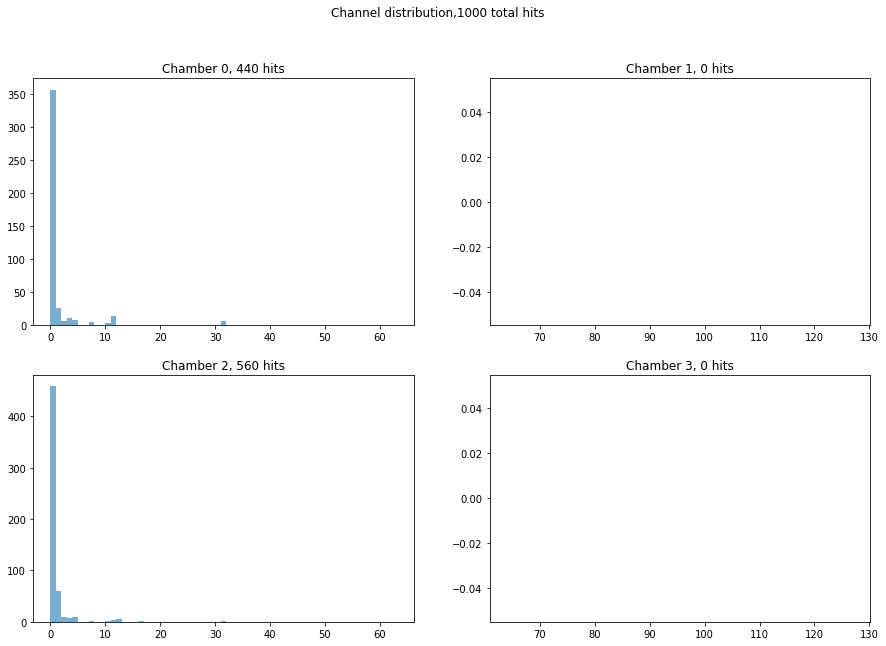

KeyboardInterrupt: 

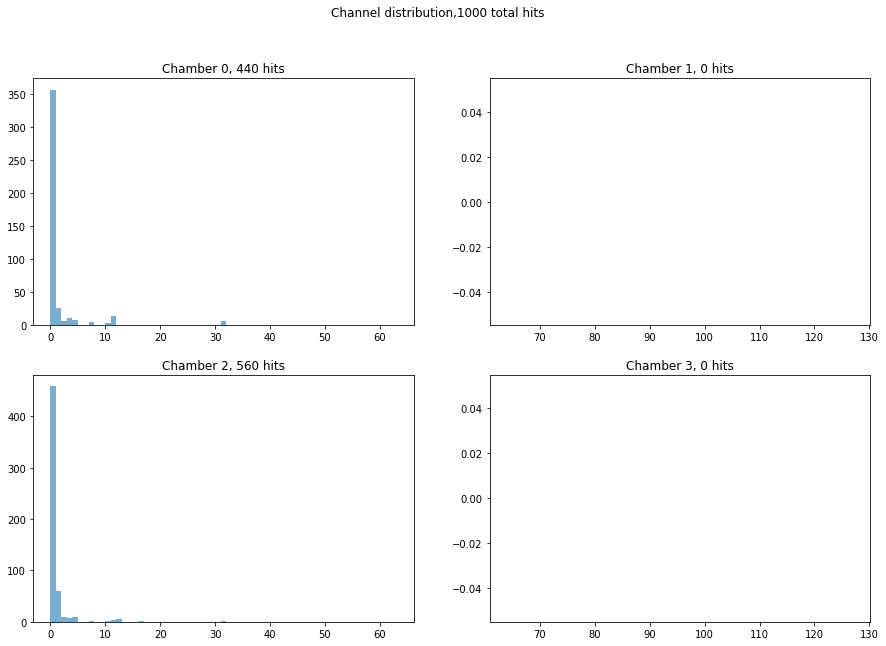

In [37]:
fig, axes = plt.subplots(2,2, figsize = (15,10))
for message in consumer:
    rt_plot(json.loads(message.value),fig,axes)